# Data Cleaning Project Walkthrough and Analyzing NYC High School Data
## Segment 1:

### 1. Introduction
In this mission, we'll walk through the first part of a complete data science project, including how to acquire the raw data. The project will focus on exploring and analyzing a data set. We'll develop our data cleaning and storytelling skills, which will enable us to build complete projects on our own.

We'll focus primarily on data exploration in this mission. We'll also combine several messy data sets into a single clean one to make analysis easier. Over the next few missions, we'll work through the rest of our project and perform the actual analysis.

The first step in creating a project is to decide on a topic. We want the topic to be something we're interested in and motivated to explore. For the purposes of this project, we'll be using data about New York City public schools, which can be found here.

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Given our prior knowledge of this topic, investigating the correlations between [SAT scores](https://en.wikipedia.org/wiki/SAT) and demographics might be an interesting angle to take. We could correlate SAT scores with factors like race, gender, income, and more.



In [1]:
"""
Import get_gifNimage library with which we can use to download pictures from the web
and display them from the drive: so we can create better visualisation for markdown.
https://pypi.org/project/get-gifNimage/

Function get_gifNimage() opens any image listed below:

- jpg
- jpeg
- png
- svg

Also it opens gif from a link (in string format). After that, it will be saved in the current folder,
convert (if needed) to png (from svg format) and - finally - displayed.
The function deletes the svg file after conversion - in that case,
it will leave only the png version so there won't be any useless files in the folder.
"""
# If it is not installed, unhash it:
# !pip install get-gifNimage==0.3.8 

import get_gifNimage
from get_gifNimage import get_gifNimage

# A picture name needed for the markdown posted in the next cell below:
get_gifNimage("https://s3.amazonaws.com/dq-content/sat.png", markdown_name=True) 

![SegmentLocal]( sat.png )


## 2. Finding All of the Relevant Data Sets in the Sat:

The SAT, or Scholastic Aptitude Test, is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2). The first few rows of the SAT data look like this:

![SegmentLocal]( sat.png )

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

- [`SAT scores by school`](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
- [`School attendance`](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) - Attendance information for each school in New York City
- [`Class size`](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
- [`AP test results`](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [`Graduation outcomes`](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated and other outcome information
- [`Demographics`](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
- [`School survey`](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

-------------

### 3. Reading in the Data

Before we move into coding, we'll need to do some background research. A thorough understanding of the data will help us avoid costly mistakes, such as thinking that a column represents something other than what it does. Background research will also give us a better understanding of how to combine and analyze the data.

In this case, we'll want to research:

- [`New York City`](https://en.wikipedia.org/wiki/New_York_City)
- [`The SAT`](https://en.wikipedia.org/wiki/SAT)
- [`Schools in New York City`](https://en.wikipedia.org/wiki/List_of_high_schools_in_New_York_City)
- [`Our data`](https://data.cityofnewyork.us/browse?category=Education)

We can learn a few different things from these resources. For example:

- Only high school students take the SAT, so we'll want to focus on high schools.
- New York City is made up of five boroughs, which are essentially distinct regions.
- New York City schools fall within several different school districts, each of which can contains dozens of schools.
- Our data sets include several different types of schools. We'll need to clean them so that we can focus on high schools only.
- Each school in New York City has a unique code called a DBN, or district borough number.
- Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

Once we've done our background research, we're ready to read in the data. We've placed all the data into the schools folder. Here are all of the files in the folder:

`ap_2010.csv` - Data on AP test results
`class_size.csv` - Data on class size
`demographics.csv` - Data on demographics
`graduation.csv` - Data on graduation outcomes
`hs_directory.csv` - A directory of high schools
`sat_results.csv` - Data on SAT scores
`survey_all.txt` - Data on surveys from all schools
`survey_d75.txt` - Data on surveys from New York City district 75
`survey_all.txt` and survey_d75.txt are in more complicated formats than the other files. For now, we'll focus on reading in the CSV files only, and then explore them.

We'll read each file into a pandas dataframe, and then store all of the dataframes in a dictionary. This will give us a convenient way to store them, and a quick way to reference them later on.

In [2]:
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"]

data = {}
    
for f in data_files:
    d =  pd.read_csv("schools/{0}".format(f))
    key_name = f.replace('.csv', '')
    data[key_name] = d

### 4. Exploring the SAT Data

What we're mainly interested in is the SAT data set, which corresponds to the dictionary key `sat_results`. This data set contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this data set with information in the other data sets.

Let's explore `sat_results` to see what we can discover. Exploring the dataframe will help us understand the structure of the data, and make it easier for us to analyze it.

In [3]:
print(data['sat_results'].head(5))

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

------------
### 5. Exploring the Remaining Data

When we printed the first five rows of the SAT data, the output looked like this:

<div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors" style="visibility: hidden;"><div class="CodeMirror-cursor" style="left: 263.2px; top: 160px; height: 19.6px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">DBN</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">SCHOOL</span> <span class="cm-variable">NAME</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M292</span> &nbsp;<span class="cm-variable">HENRY</span> <span class="cm-variable">STREET</span> <span class="cm-variable">SCHOOL</span> <span class="cm-variable">FOR</span> <span class="cm-variable">INTERNATIONAL</span> <span class="cm-variable">STUDIES</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M448</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">UNIVERSITY</span> <span class="cm-variable">NEIGHBORHOOD</span> <span class="cm-variable">HIGH</span> <span class="cm-variable">SCHOOL</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M450</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">EAST</span> <span class="cm-variable">SIDE</span> <span class="cm-variable">COMMUNITY</span> <span class="cm-variable">SCHOOL</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M458</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">FORSYTH</span> <span class="cm-variable">SATELLITE</span> <span class="cm-variable">ACADEMY</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M509</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">MARTA</span> <span class="cm-variable">VALLE</span> <span class="cm-variable">HIGH</span> <span class="cm-variable">SCHOOL</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span cm-text="">​</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"> &nbsp;<span class="cm-variable">Num</span> <span class="cm-variable">of</span> <span class="cm-variable">SAT</span> <span class="cm-variable">Test</span> <span class="cm-variable">Takers</span> <span class="cm-variable">SAT</span> <span class="cm-variable">Critical</span> <span class="cm-variable">Reading</span> <span class="cm-variable">Avg</span>. <span class="cm-property">Score</span> <span class="cm-variable">SAT</span> <span class="cm-variable">Math</span> <span class="cm-variable">Avg</span>. <span class="cm-property">Score</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">29</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">355</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">404</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">91</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">383</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">423</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">70</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">377</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">402</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">7</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">414</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">401</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">44</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">390</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">433</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span cm-text="">​</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"> &nbsp;<span class="cm-variable">SAT</span> <span class="cm-variable">Writing</span> <span class="cm-variable">Avg</span>. <span class="cm-property">Score</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">363</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">366</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">370</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">359</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">384</span></span></pre></div></div>
We can make a few observations based on this output:

- The `DBN` appears to be a unique ID for each school.
- We can tell from the first few rows of names that we only have data about high schools.
- There's only a single row for each high school, so each DBN is unique in the SAT data.
- We may eventually want to combine the three columns that contain SAT scores -- `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `SAT Writing Avg. Score` -- into a single column to make the scores easier to analyze.

Given these observations, let's explore the other data sets to see if we can gain any insight into how to combine them.

In [4]:
for key in data:
    print(data[key].head(5))

      DBN                             SchoolName  AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.             39.0   
1  01M450                 EAST SIDE COMMUNITY HS             19.0   
2  01M515                    LOWER EASTSIDE PREP             24.0   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH            255.0   
4  02M296  High School of Hospitality Management              NaN   

   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               49.0                                  10.0  
1               21.0                                   NaN  
2               26.0                                  24.0  
3              377.0                                 191.0  
4                NaN                                   NaN  
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K     

### 6. Reading in the Survey Data

In the last step, we saw a group of dataframes that looked like this:
<div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors" style=""><div class="CodeMirror-cursor" style="left: 695.2px; top: 40px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">CSD</span> <span class="cm-variable">BOROUGH</span> <span class="cm-variable">SCHOOL</span> <span class="cm-variable">CODE</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">SCHOOL</span> <span class="cm-variable">NAME</span> <span class="cm-variable">GRADE</span> &nbsp;<span class="cm-variable">PROGRAM</span> <span class="cm-variable">TYPE</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-number">0</span><span class="cm-variable">K</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-number">0</span><span class="cm-variable">K</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">CTT</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">CTT</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre></div></div></div></div>
We can make some observations based on the first few rows of each one.

- Each data set appears to either have a `DBN` column, or the information we need to create one. That means we can use a `DBN` column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical `DBN`s, then group all of their columns together in a single data set.
- Some fields look interesting for mapping -- particularly `Location 1`, which contains coordinates inside a larger string.
- Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate `DBN` values). That means we’ll have to do some preprocessing to ensure that each `DBN` is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.

Before we proceed with the merge, we should make sure we have all of the data we want to unify. We mentioned the survey data earlier (`survey_all.txt` and `survey_d75.txt`), but we didn't read those files in because they're in a slightly more complex format.

Each survey text file looks like this:
<div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">dbn</span> <span class="cm-variable">bn</span> &nbsp;<span class="cm-variable">schoolname</span> &nbsp;<span class="cm-variable">d75</span> <span class="cm-variable">studentssurveyed</span> &nbsp; &nbsp;<span class="cm-variable">highschool</span> &nbsp;<span class="cm-variable">schooltype</span> &nbsp;<span class="cm-variable">rr_s</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-string">"01M015"</span> &nbsp; &nbsp;<span class="cm-string">"M015"</span> &nbsp;<span class="cm-string">"P.S. 015 Roberto Clemente"</span> <span class="cm-number">0</span> &nbsp; <span class="cm-string">"No"</span> &nbsp; &nbsp;<span class="cm-number">0</span> &nbsp; <span class="cm-string">"Elementary School"</span> &nbsp; &nbsp; <span class="cm-number">88</span></span></pre></div>

The files are tab delimited and encoded with `Windows-1252 encoding`. An encoding defines how a computer stores the contents of a file in binary. The most common encodings are `UTF-8` and `ASCII`. `Windows-1252` is rarely used, and can cause errors if we read such a file in without specifying the encoding. To read more about encodings, [here's](https://kunststube.net/encoding/) a good primer.

We'll need to specify the encoding and delimiter to the pandas [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to ensure it reads the surveys in properly.

After we read in the survey data, we'll want to combine it into a single dataframe. We can do this by calling the [pandas.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function:
<div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">z</span> <span class="cm-operator">=</span> <span class="cm-variable">pd</span>.<span class="cm-property">concat</span>([<span class="cm-variable">x</span>,<span class="cm-variable">y</span>], <span class="cm-variable">axis</span><span class="cm-operator">=</span><span class="cm-number">0</span>)</span></pre></div>

The code above will combine dataframes `x` and `y` by essentially appending `y` to the end of `x`. The combined dataframe `z` will have the number of rows in `x` plus the number of rows in `y`.

Things we should do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Read in <code>survey_all.txt</code>.<ul>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html" target="_blank">pandas.read_csv()</a> function to read <code>survey_all.txt</code> into the variable <code>all_survey</code>.  Recall that this file is located in the <code>schools</code> folder.<ul>
<li>Specify the keyword argument <code>delimiter="\t"</code>.</li>
<li>Specify the keyword argument <code>encoding="windows-1252"</code>.</li>
</ul>
</li>
</ul>
</li>
<li>Read in <code>survey_d75.txt</code>.<ul>
<li>Use the <code>pandas.read_csv()</code> function to read <code>schools/survey_d75.txt</code> into the variable <code>d75_survey</code>.  Recall that this file is located in the <code>schools</code> folder.<ul>
<li>Specify the keyword argument <code>delimiter="\t"</code>.</li>
<li>Specify the keyword argument <code>encoding="windows-1252"</code>.</li>
</ul>
</li>
</ul>
</li>
<li>Combine <code>d75_survey</code> and <code>all_survey</code> into a single dataframe.<ul>
<li>Use the pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html" target="_blank">concat()</a> function with the keyword argument <code>axis=0</code> to combine <code>d75_survey</code> and <code>all_survey</code> into the dataframe <code>survey</code>.</li>
<li>Pass in <code>all_survey</code> first, then <code>d75_survey</code> when calling the <code>pandas.concat()</code> function. </li>
</ul>
</li>
<li>Display the first five rows of <code>survey</code> using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html" target="_blank">pandas.DataFrame.head()</a> function.</li>
</ul></div>

In [5]:
# z = pd.concat([x,y], axis=0)
all_survey = pd.read_csv('schools/survey_all.txt', encoding='windows-1252', delimiter="\t")

d75_survey = pd.read_csv('schools/survey_d75.txt', encoding='windows-1252', delimiter='\t')

survey = pd.concat([all_survey, d75_survey], axis=0, sort='True')


survey.head(5)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [6]:
get_gifNimage("https://s3.amazonaws.com/dq-content/xj5ud4r.png", markdown_name=True)

![SegmentLocal]( xj5ud4r.png )


### 7. Cleaning Up the Surveys

In the last step, the expected output was:

<div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">dbn</span> &nbsp; &nbsp;<span class="cm-variable">bn</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">schoolname</span> &nbsp;<span class="cm-variable">d75</span> <span class="cm-variable">studentssurveyed</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">M015</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp;<span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">No</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M019</span> &nbsp;<span class="cm-variable">M019</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">19</span> <span class="cm-variable">Asher</span> <span class="cm-variable">Levy</span> &nbsp; &nbsp;<span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">No</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M020</span> &nbsp;<span class="cm-variable">M020</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">20</span> <span class="cm-variable">Anna</span> <span class="cm-variable">Silver</span> &nbsp; &nbsp;<span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">No</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M034</span> &nbsp;<span class="cm-variable">M034</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">34</span> <span class="cm-variable">Franklin</span> <span class="cm-variable">D</span>. <span class="cm-property">Roosevelt</span> &nbsp; &nbsp;<span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">Yes</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M063</span> &nbsp;<span class="cm-variable">M063</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">63</span> <span class="cm-variable">William</span> <span class="cm-variable">McKinley</span> &nbsp; &nbsp;<span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">No</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span cm-text="">​</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"> &nbsp; <span class="cm-variable">highschool</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">schooltype</span> &nbsp;<span class="cm-variable">rr_s</span> &nbsp;<span class="cm-variable">rr_t</span> &nbsp;<span class="cm-variable">rr_p</span> &nbsp;<span class="cm-operator">...</span> &nbsp;<span class="cm-variable">s_q14_2</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">Elementary</span> <span class="cm-variable">School</span> &nbsp; <span class="cm-variable">NaN</span> &nbsp; &nbsp;<span class="cm-number">88</span> &nbsp; &nbsp;<span class="cm-number">60</span> &nbsp;<span class="cm-operator">...</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">Elementary</span> <span class="cm-variable">School</span> &nbsp; <span class="cm-variable">NaN</span> &nbsp; <span class="cm-number">100</span> &nbsp; &nbsp;<span class="cm-number">60</span> &nbsp;<span class="cm-operator">...</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">Elementary</span> <span class="cm-variable">School</span> &nbsp; <span class="cm-variable">NaN</span> &nbsp; &nbsp;<span class="cm-number">88</span> &nbsp; &nbsp;<span class="cm-number">73</span> &nbsp;<span class="cm-operator">...</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.0</span> &nbsp;<span class="cm-variable">Elementary</span> <span class="cm-operator">/</span> <span class="cm-variable">Middle</span> <span class="cm-variable">School</span> &nbsp;<span class="cm-number">89.0</span> &nbsp; &nbsp;<span class="cm-number">73</span> &nbsp; &nbsp;<span class="cm-number">50</span> &nbsp;<span class="cm-operator">...</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.0</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">Elementary</span> <span class="cm-variable">School</span> &nbsp; <span class="cm-variable">NaN</span> &nbsp; <span class="cm-number">100</span> &nbsp; &nbsp;<span class="cm-number">60</span> &nbsp;<span class="cm-operator">...</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span cm-text="">​</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"> &nbsp; <span class="cm-variable">s_q14_3</span> &nbsp;<span class="cm-variable">s_q14_4</span> &nbsp;<span class="cm-variable">s_q14_5</span> &nbsp;<span class="cm-variable">s_q14_6</span> &nbsp;<span class="cm-variable">s_q14_7</span> &nbsp;<span class="cm-variable">s_q14_8</span> &nbsp;<span class="cm-variable">s_q14_9</span> &nbsp;<span class="cm-variable">s_q14_10</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span cm-text="">​</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"> &nbsp; <span class="cm-variable">s_q14_11</span> &nbsp;</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp;</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp;</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp;</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp;</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span> &nbsp;</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span cm-text="">​</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">[<span class="cm-number">5</span> <span class="cm-variable">rows</span> <span class="cm-variable">x</span> <span class="cm-number">2773</span> <span class="cm-variable">columns</span>]</span></pre></div>

There are two immediate facts that we can see in the data:

- There are over `2000` columns, nearly all of which we don't need. We'll have to filter the data to remove the unnecessary ones. Working with fewer columns will make it easier to print the dataframe out and find correlations within it.
- The survey data has a `DBN` column that we'll want to convert to uppercase (`DBN`). The conversion will make the column name consistent with the other data sets.

First, we'll need to filter the columns to remove the ones we don't need. Luckily, there's a data dictionary at [the original data download location](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). The dictionary tells us what each column represents. Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.

Here's a preview of the data dictionary:

![SegmentLocal]( xj5ud4r.png )

Based on the dictionary, it looks like these are the relevant columns:
<div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;">[<span class="cm-string">"dbn"</span>, <span class="cm-string">"rr_s"</span>, <span class="cm-string">"rr_t"</span>, <span class="cm-string">"rr_p"</span>, <span class="cm-string">"N_s"</span>, <span class="cm-string">"N_t"</span>, <span class="cm-string">"N_p"</span>, <span class="cm-string">"saf_p_11"</span>, <span class="cm-string">"com_p_11"</span>, <span class="cm-string">"eng_p_11"</span>, <span class="cm-string">"aca_p_11"</span>, <span class="cm-string">"saf_t_11"</span>, <span class="cm-string">"com_t_11"</span>, <span class="cm-string">"eng_t_11"</span>, <span class="cm-string">"aca_t_11"</span>, <span class="cm-string">"saf_s_11"</span>, <span class="cm-string">"com_s_11"</span>, <span class="cm-string">"eng_s_11"</span>, <span class="cm-string">"aca_s_11"</span>, <span class="cm-string">"saf_tot_11"</span>, <span class="cm-string">"com_tot_11"</span>, <span class="cm-string">"eng_tot_11"</span>, <span class="cm-string">"aca_tot_11"</span>]</span></pre></div>

<div>
<p>These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more.  It will also give us the <code>DBN</code>, which allows us to uniquely identify the school. </p>
<p>Before we filter columns out, we'll want to copy the data from the <code>dbn</code> column into a new column called <code>DBN</code>.  We can copy columns like this:</p>
</div>

<div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">survey</span>[<span class="cm-string">"new_column"</span>] <span class="cm-operator">=</span> <span class="cm-variable">survey</span>[<span class="cm-string">"old_column"</span>]</span></pre></div>

In [7]:
survey["DBN"] = survey["dbn"]

survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

In [8]:
get_gifNimage('https://pasteboard.co/K3zGqEqD.png', markdown_name=True)
get_gifNimage('https://pasteboard.co/K3zGKMl.png', markdown_name=True)

![SegmentLocal]( K3zGqEqD.png )
![SegmentLocal]( K3zGKMl.png )


### 8. Inserting DBN Fields

<div class="dq-px-8"><div id="body" class="dq-mission-markup MissionLearn__section"><div><p>When we explored all of the data sets, we noticed that some of them, like <code>class_size</code> and <code>hs_directory</code>, don't have a <code>DBN</code> column.  <code>hs_directory</code> does have a <code>dbn</code> column, though, so we can just rename it.</p>
<p>However, <code>class_size</code> doesn't appear to have the column at all.  Here are the first few rows of the data set:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 108px; left: 704.8px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 140px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><span><span>​</span>x</span></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 704.8px; top: 100px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">CSD</span> <span class="cm-variable">BOROUGH</span> <span class="cm-variable">SCHOOL</span> <span class="cm-variable">CODE</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">SCHOOL</span> <span class="cm-variable">NAME</span> <span class="cm-variable">GRADE</span> &nbsp;<span class="cm-variable">PROGRAM</span> <span class="cm-variable">TYPE</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-number">0</span><span class="cm-variable">K</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-number">0</span><span class="cm-variable">K</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">CTT</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">CTT</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp;<span class="cm-number">1</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">M</span> &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">M015</span> &nbsp;<span class="cm-variable">P</span>.<span class="cm-property">S</span>. <span class="cm-error">0</span><span class="cm-number">15</span> <span class="cm-variable">Roberto</span> <span class="cm-variable">Clemente</span> &nbsp; &nbsp; <span class="cm-error">0</span><span class="cm-number">2</span> &nbsp; &nbsp; &nbsp; <span class="cm-variable">GEN</span> <span class="cm-variable">ED</span></span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 140px;"></div><div class="CodeMirror-gutters" style="display: none; height: 173px;"></div></div></div></div><div>
<p>Here are the first few rows of the <code>sat_results</code> data, which does have a <code>DBN</code> column:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 108px; left: 541.6px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 140px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 541.6px; top: 100px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">DBN</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">SCHOOL</span> <span class="cm-variable">NAME</span>  \</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M292</span> &nbsp;<span class="cm-variable">HENRY</span> <span class="cm-variable">STREET</span> <span class="cm-variable">SCHOOL</span> <span class="cm-variable">FOR</span> <span class="cm-variable">INTERNATIONAL</span> <span class="cm-variable">STUDIES</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M448</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">UNIVERSITY</span> <span class="cm-variable">NEIGHBORHOOD</span> <span class="cm-variable">HIGH</span> <span class="cm-variable">SCHOOL</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M450</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">EAST</span> <span class="cm-variable">SIDE</span> <span class="cm-variable">COMMUNITY</span> <span class="cm-variable">SCHOOL</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M458</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">FORSYTH</span> <span class="cm-variable">SATELLITE</span> <span class="cm-variable">ACADEMY</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp;<span class="cm-error">0</span><span class="cm-number">1</span><span class="cm-variable">M509</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">MARTA</span> <span class="cm-variable">VALLE</span> <span class="cm-variable">HIGH</span> <span class="cm-variable">SCHOOL</span></span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 140px;"></div><div class="CodeMirror-gutters" style="display: none; height: 173px;"></div></div></div></div><div>
<p>From looking at these rows, we can tell that the <code>DBN</code> in the <code>sat_results</code> data is just a combination of the <code>CSD</code> and <code>SCHOOL CODE</code> columns in the <code>class_size</code> data.  The main difference is that the <code>DBN</code> is padded, so that the <code>CSD</code> portion of it always consists of two digits. That means we'll need to add a leading <code>0</code> to the <code>CSD</code> if the <code>CSD</code> is less than two digits long.</p>

<p>As we can see, whenever the <code>CSD</code> is less than two digits long, we need to add a leading <code>0</code>.  We can accomplish this using the <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html" target="_blank">pandas.Series.apply()</a> method, along with a custom function that:</p>
<ul>
<li>Takes in a number.</li>
<li>Converts the number to a string using the <a href="https://docs.python.org/3/library/stdtypes.html#str" target="_blank">str()</a> function.</li>
<li>Check the length of the string using the <a href="https://docs.python.org/3/library/functions.html#len" target="_blank">len()</a> function.<ul>
<li>If the string is two digits long, returns the string.</li>
<li>If the string is one digit long, adds a <code>0</code> to the front of the string, then returns it.<ul>
<li>We can use the string method <a href="https://docs.python.org/3/library/stdtypes.html#str.zfill" target="_blank">zfill()</a> to do this.</li>
</ul>
</li>
</ul>
</li>
</ul>
<p>Once we've padded the <code>CSD</code>, we can use the addition operator (<code>+</code>) to combine the values in the <code>CSD</code> and <code>SCHOOL CODE</code> columns.  Here's an example of how we would do this:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 8px; left: 724px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 40px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 724px; top: 0px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">dataframe</span>[<span class="cm-string">"new_column"</span>] <span class="cm-operator">=</span> <span class="cm-variable">dataframe</span>[<span class="cm-string">"column_one"</span>] <span class="cm-operator">+</span> <span class="cm-variable">dataframe</span>[<span class="cm-string">"column_two"</span>]</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 40px;"></div><div class="CodeMirror-gutters" style="display: none; height: 73px;"></div></div></div></div><div>
<p></p>
</div></div></div>

Things we should do:
<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Copy the <code>dbn</code> column in <code>hs_directory</code> into a new column called <code>DBN</code>.</li>
<li>Create a new column called <code>padded_csd</code> in the <code>class_size</code> data set.<ul>
<li>Use the <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html" target="_blank">pandas.Series.apply()</a> method along with a custom function to generate this column.<ul>
<li>Make sure to apply the function along the <code>data["class_size"]["CSD"]</code> column.</li>
</ul>
</li>
</ul>
</li>
<li>Use the addition operator (<code>+</code>) along with the <code>padded_csd</code> and <code>SCHOOL CODE</code> columns of <code>class_size</code>, then assign the result to the <code>DBN</code> column of <code>class_size</code>.</li>
<li>Display the first few rows of <code>class_size</code> to double check the <code>DBN</code> column.</li>
</ul></div>

In [9]:
data['hs_directory']['DBN'] = data['hs_directory']['dbn']

def csd_num_convert(num):
    return str(num).zfill(2)
    
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(csd_num_convert)

data['class_size']['DBN'] = data['class_size']['padded_csd'] + data['class_size']['SCHOOL CODE']

print(data['class_size'].head())

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \


### 9. Combining the SAT Scores

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>Now we're almost ready to combine our data sets.  Before we do, let's take some time to calculate variables that will be useful in our analysis.  We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam.  This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.</p>
<p>Before we can generate this column, we'll need to convert the <code>SAT Math Avg. Score</code>, <code>SAT Critical Reading Avg. Score</code>, and <code>SAT Writing Avg. Score</code> columns in the <code>sat_results</code> data set from the object (string) data type to a numeric data type.  We can use the <a href="http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.to_numeric.html" target="_blank">pandas.to_numeric()</a> method for the conversion.  If we don't convert the values, we won't be able to add the columns together.</p>
<p>It's important to pass the keyword argument <code>errors="coerce"</code> when we call <code>pandas.to_numeric()</code>, so that pandas treats any invalid strings it can't convert to numbers as missing values instead.</p>
<p>After we perform the conversion, we can use the addition operator (<code>+</code>) to add all three columns together.</p></div></div>

Things we should do:
<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Convert the <code>SAT Math Avg. Score</code>, <code>SAT Critical Reading Avg. Score</code>, and <code>SAT Writing Avg. Score</code> columns in the <code>sat_results</code> data set from the object (string) data type to a numeric data type.<ul>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.to_numeric.html" target="_blank">pandas.to_numeric()</a> function on each of the columns, and assign the result back to the same column.</li>
<li>Pass in the keyword argument <code>errors="coerce"</code>.</li>
</ul>
</li>
<li>Create a column called <code>sat_score</code> in <code>sat_results</code> that holds the combined SAT score for each student.<ul>
<li>Add up <code>SAT Math Avg. Score</code>, <code>SAT Critical Reading Avg. Score</code>, and <code>SAT Writing Avg. Score</code>, and assign the total to the <code>sat_score</code> column of <code>sat_results</code>.</li>
</ul>
</li>
<li>Display the first few rows of the <code>sat_score</code> column of <code>sat_results</code> to verify that everything went okay.</li>
</ul></div>

In [10]:
data["sat_results"]["SAT Math Avg. Score"] = (pd.to_numeric(data['sat_results']['SAT Math Avg. Score'],
                                                            errors='coerce')
                                             )

data["sat_results"]['SAT Critical Reading Avg. Score'] = (pd.to_numeric
                                                          (data['sat_results']['SAT Critical Reading Avg. Score'],
    errors='coerce')
                                                         )

data["sat_results"]['SAT Writing Avg. Score'] = (pd.to_numeric
                                                 (data['sat_results']['SAT Writing Avg. Score'],
                                                  errors='coerce')
                                                )

data['sat_results']['sat_score'] = (data['sat_results']['SAT Math Avg. Score'] 
                                    +  data['sat_results']['SAT Critical Reading Avg. Score'] 
                                    +  data['sat_results']['SAT Writing Avg. Score']
                                   )

### 10. Parsing Geographic Coordinates for Schools

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>Next, we'll want to parse the latitude and longitude coordinates for each school.  This will enable us to map the schools and uncover any geographic patterns in the data.  The coordinates are currently in the text field <code>Location 1</code> in the <code>hs_directory</code> data set.</p>
<p>Let's take a look at the first few rows:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 187.6px; left: 320.8px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 220px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><span><span>​</span>x</span></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 320.8px; top: 179.6px; height: 20.4px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">0</span> &nbsp; &nbsp;<span class="cm-number">883</span> <span class="cm-variable">Classon</span> <span class="cm-variable">Avenue</span>\<span class="cm-variable">nBrooklyn</span>, <span class="cm-variable">NY</span> <span class="cm-number">11225</span>\<span class="cm-variable">n</span>(<span class="cm-number">40.67</span><span class="cm-operator">...</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1</span> &nbsp; &nbsp;<span class="cm-number">1110</span> <span class="cm-variable">Boston</span> <span class="cm-variable">Road</span>\<span class="cm-variable">nBronx</span>, <span class="cm-variable">NY</span> <span class="cm-number">10456</span>\<span class="cm-variable">n</span>(<span class="cm-number">40.8276026</span><span class="cm-operator">...</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">2</span> &nbsp; &nbsp;<span class="cm-number">1501</span> <span class="cm-variable">Jerome</span> <span class="cm-variable">Avenue</span>\<span class="cm-variable">nBronx</span>, <span class="cm-variable">NY</span> <span class="cm-number">10452</span>\<span class="cm-variable">n</span>(<span class="cm-number">40.84241</span><span class="cm-operator">...</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">3</span> &nbsp; &nbsp;<span class="cm-number">411</span> <span class="cm-variable">Pearl</span> <span class="cm-variable">Street</span>\<span class="cm-variable">nNew</span> <span class="cm-variable">York</span>, <span class="cm-variable">NY</span> <span class="cm-number">10038</span>\<span class="cm-variable">n</span>(<span class="cm-number">40.7106</span><span class="cm-operator">...</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">4</span> &nbsp; &nbsp;<span class="cm-number">160</span><span class="cm-operator">-</span><span class="cm-number">20</span> <span class="cm-variable">Goethals</span> <span class="cm-variable">Avenue</span>\<span class="cm-variable">nJamaica</span>, <span class="cm-variable">NY</span> <span class="cm-number">11432</span>\<span class="cm-variable">n</span>(<span class="cm-number">40.</span>..</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 220px;"></div><div class="CodeMirror-gutters" style="display: none; height: 253px;"></div></div></div></div><div>
<p>As we can see, this field contains a lot of information we don't need.  We want to extract the coordinates, which are in parentheses at the end of the field.  Here's an example:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 47.6px; left: 186.4px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 80px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 186.4px; top: 39.6px; height: 20.4px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-number">1110</span> <span class="cm-variable">Boston</span> <span class="cm-variable">Road</span>\<span class="cm-variable">nBronx</span>, <span class="cm-variable">NY</span> <span class="cm-number">10456</span>\<span class="cm-variable">n</span>(<span class="cm-number">40.8276026690005</span>, <span class="cm-operator">-</span><span class="cm-number">73.90447525699966</span>)</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 80px;"></div><div class="CodeMirror-gutters" style="display: none; height: 113px;"></div></div></div></div><div>
<p>We want to extract the latitude, <code>40.8276026690005</code>, and the longitude, <code>-73.90447525699966</code>.  Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.</p>
<p>We can do the extraction with a regular expression.  The following expression will pull out everything inside the parentheses:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 8px; left: 90.4px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 120px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors" style=""><div class="CodeMirror-cursor" style="left: 90.4px; top: 0px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-keyword">import</span> <span class="cm-variable">re</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">re</span>.<span class="cm-property">findall</span>(<span class="cm-string">"\(.+\)"</span>, <span class="cm-string">"1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)"</span>)</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 120px;"></div><div class="CodeMirror-gutters" style="display: none; height: 153px;"></div></div></div></div><div>
<p>This command will return <code>[(40.8276026690005, -73.90447525699966)]</code>.  We'll need to process this result further using the string methods <a href="https://docs.python.org/3/library/stdtypes.html#str.split" target="_blank">split()</a> and <a href="https://docs.python.org/3/library/stdtypes.html#str.replace" target="_blank">replace()</a> methods to extract each coordinate.</p></div></div>

Things we should do:
<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Write a function that:<ul>
<li>Takes in a string</li>
<li>Uses the regular expression above to extract the coordinates</li>
<li>Uses string manipulation functions to pull out the latitude</li>
<li>Returns the latitude</li>
</ul>
</li>
<li>Use the <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html" target="_blank">Series.apply()</a> method to apply the function across the <code>Location 1</code> column of <code>hs_directory</code>.  Assign the result to the <code>lat</code> column of <code>hs_directory</code>.</li>
<li>Display the first few rows of <code>hs_directory</code> to verify the results.</li>
</ul></div>

In [11]:
import re

def gps_convert_lat(string):
    gps_lat_lon = re.findall("\(.+\)", string)
    gps_lat = gps_lat_lon[0].split(",")[0].replace('(',"")
    return gps_lat
    
data['hs_directory']['lat'] = data['hs_directory']['Location 1'].apply(gps_convert_lat)

print(data['hs_directory']['lat'].head())

0    40.601989336
1    40.593593811
2    40.692133704
3    40.822303765
4    40.773670507
Name: lat, dtype: object


### 11. Extracting the Longitude

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>On the last screen, we parsed the latitude from the <code>Location 1</code> column.  Now we'll just need to do the same for the longitude.</p>
<p>Once we have both coordinates, we'll need to convert them to numeric values.  We can use the <code>pandas.to_numeric()</code> function to convert them from strings to numbers.</p></div></div>

Things we should do:
<ul>
<li>Write a function that:<ul>
<li>Takes in a string.</li>
<li>Uses the regular expression on the previous screen to extract the coordinates.</li>
<li>Uses string manipulation functions to pull out the longitude.</li>
<li>Returns the longitude.</li>
</ul>
</li>
<li>Use the <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html" target="_blank">Series.apply()</a> method to apply the function across the <code>Location 1</code> column of <code>hs_directory</code>.  Assign the result to the <code>lon</code> column of <code>hs_directory</code>.</li>
<li>Use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html" target="_blank">to_numeric()</a> function to convert the <code>lat</code> and <code>lon</code> columns of <code>hs_directory</code> to numbers.<ul>
<li>Specify the <code>errors="coerce"</code> keyword argument to handle missing values properly.</li>
</ul>
</li>
<li>Display the first few rows of <code>hs_directory</code> to verify the results.</li>
</ul>

In [12]:
import re

def gps_convert_lon(string):
    gps_lat_lon = re.findall("\(.+\)", string)
    gps_lon = gps_lat_lon[0].split(",")[1].replace(')',"").strip()
    return gps_lon

data['hs_directory']['lon'] = data['hs_directory']['Location 1'].apply(gps_convert_lon)

data["hs_directory"]["lon"] = pd.to_numeric(data['hs_directory']['lon'],errors='coerce')

data["hs_directory"]["lat"] = pd.to_numeric(data['hs_directory']['lat'],errors='coerce')

print(data['hs_directory'].head())

      dbn                                        school_name    borough  \
0  27Q260          Frederick Douglass Academy VI High School     Queens   
1  21K559        Life Academy High School for Film and Music   Brooklyn   
2  16K393     Frederick Douglass Academy IV Secondary School   Brooklyn   
3  08X305                               Pablo Neruda Academy      Bronx   
4  03M485  Fiorello H. LaGuardia High School of Music & A...  Manhattan   

  building_code  phone_number    fax_number  grade_span_min  grade_span_max  \
0          Q465  718-471-2154  718-471-2890             9.0              12   
1          K400  718-333-7750  718-333-7775             9.0              12   
2          K026  718-574-2820  718-574-2821             9.0              12   
3          X450  718-824-1682  718-824-1663             9.0              12   
4          M485  212-496-0700  212-724-5748             9.0              12   

   expgrade_span_min  expgrade_span_max  ...  \
0                NaN      

### 12. Next Steps:

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>We're almost ready to combine our data sets!  We've come a long way in this mission -- we've gone from choosing a topic for a project to acquiring the data to having clean data that we're almost ready to combine.</p>
<p>In the next segment, we'll finish cleaning the data sets, then combine them so we can start our analysis.</p></div></div>

------------
## Segment 2:
------------
### 1. Introduction

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>In the last mission, we began investigating possible relationships between SAT scores and demographic factors.  In order to do this, we acquired several data sets about <a href="https://data.cityofnewyork.us/data?cat=education" target="_blank">New York City public schools</a>.  We manipulated these data sets, and found that we could combine them all using the <code>DBN</code> column.  All of the data sets are currently stored as keys in the <code>data</code> dictionary.  Each individual data set is a pandas dataframe.</p>
<p>In this mission, we'll clean the data a bit more, then combine it.  Finally, we'll compute correlations and perform some analysis.</p>

-----------
    
### 2. Condensing the Class Size Data Set
<p>The first thing we'll need to do in preparation for the merge is condense some of the data sets.  In the last mission, we noticed that the values in the <code>DBN</code> column were unique in the <code>sat_results</code> data set.  Other data sets like <code>class_size</code> had duplicate <code>DBN</code> values, however.</p>
<p>We'll need to condense these data sets so that each value in the <code>DBN</code> column is unique.  If not, we'll run into issues when it comes time to combine the data sets.  </p>
<p>While the main data set we want to analyze, <code>sat_results</code>, has unique <code>DBN</code> values for every high school in New York City, other data sets aren't as clean.  A single row in the <code>sat_results</code> data set may match multiple rows in the <code>class_size</code> data set, for example.  This situation will create problems, because we don't know which of the multiple entries in the <code>class_size</code> data set we should combine with the single matching entry in <code>sat_results</code>.
<p>In the diagram above, we can't just combine the rows from both data sets because there are several cases where multiple rows in <code>class_size</code> match a single row in <code>sat_results</code>.</p>
<p>To resolve this issue, we'll condense the <code>class_size</code>, <code>graduation</code>, and <code>demographics</code> data sets so that each <code>DBN</code> is unique.</p></div></div>

<div class="dq-px-8"><div id="body" class="dq-mission-markup MissionLearn__section"><div><p>The first data set that we'll condense is <code>class_size</code>.  The first few rows of <code>class_size</code> look like this:</p>
<table class="table table-bordered">
<thead>
<tr>
<th></th>
<th>CSD</th>
<th>BOROUGH</th>
<th>SCHOOL CODE</th>
<th>SCHOOL NAME</th>
<th>GRADE</th>
<th>PROGRAM TYPE</th>
<th>CORE SUBJECT (MS CORE and 9-12 ONLY)</th>
<th>CORE COURSE (MS CORE and 9-12 ONLY)</th>
<th>SERVICE CATEGORY(K-9* ONLY)</th>
<th>NUMBER OF STUDENTS / SEATS FILLED</th>
<th>NUMBER OF SECTIONS</th>
<th>AVERAGE CLASS SIZE</th>
<th>SIZE OF SMALLEST CLASS</th>
<th>SIZE OF LARGEST CLASS</th>
<th>DATA SOURCE</th>
<th>SCHOOLWIDE PUPIL-TEACHER RATIO</th>
<th>padded_csd</th>
<th>DBN</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>M</td>
<td>M015</td>
<td>P.S. 015 Roberto Clemente</td>
<td>0K</td>
<td>GEN ED</td>
<td>-</td>
<td>-</td>
<td>-</td>
<td>19.0</td>
<td>1.0</td>
<td>19.0</td>
<td>19.0</td>
<td>19.0</td>
<td>ATS</td>
<td>NaN</td>
<td>01</td>
<td>01M015</td>
</tr>
<tr>
<th>1</th>
<td>1</td>
<td>M</td>
<td>M015</td>
<td>P.S. 015 Roberto Clemente</td>
<td>0K</td>
<td>CTT</td>
<td>-</td>
<td>-</td>
<td>-</td>
<td>21.0</td>
<td>1.0</td>
<td>21.0</td>
<td>21.0</td>
<td>21.0</td>
<td>ATS</td>
<td>NaN</td>
<td>01</td>
<td>01M015</td>
</tr>
<tr>
<th>2</th>
<td>1</td>
<td>M</td>
<td>M015</td>
<td>P.S. 015 Roberto Clemente</td>
<td>01</td>
<td>GEN ED</td>
<td>-</td>
<td>-</td>
<td>-</td>
<td>17.0</td>
<td>1.0</td>
<td>17.0</td>
<td>17.0</td>
<td>17.0</td>
<td>ATS</td>
<td>NaN</td>
<td>01</td>
<td>01M015</td>
</tr>
<tr>
<th>3</th>
<td>1</td>
<td>M</td>
<td>M015</td>
<td>P.S. 015 Roberto Clemente</td>
<td>01</td>
<td>CTT</td>
<td>-</td>
<td>-</td>
<td>-</td>
<td>17.0</td>
<td>1.0</td>
<td>17.0</td>
<td>17.0</td>
<td>17.0</td>
<td>ATS</td>
<td>NaN</td>
<td>01</td>
<td>01M015</td>
</tr>
<tr>
<th>4</th>
<td>1</td>
<td>M</td>
<td>M015</td>
<td>P.S. 015 Roberto Clemente</td>
<td>02</td>
<td>GEN ED</td>
<td>-</td>
<td>-</td>
<td>-</td>
<td>15.0</td>
<td>1.0</td>
<td>15.0</td>
<td>15.0</td>
<td>15.0</td>
<td>ATS</td>
<td>NaN</td>
<td>01</td>
<td>01M015</td>
</tr>
</tbody>
</table>
<p>As we can see, the first few rows all pertain to the same school, which is why the <code>DBN</code> appears more than once.  It looks like each school has multiple values for <code>GRADE</code>, <code>PROGRAM TYPE</code>, <code>CORE SUBJECT (MS CORE and 9-12 ONLY)</code>, and <code>CORE COURSE (MS CORE and 9-12 ONLY)</code>.  </p>
<p>If we look at the unique values for <code>GRADE</code>, we get the following:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 28px; left: 455.2px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 60px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><span><span>​</span>x</span></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 455.2px; top: 20px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">array</span>([<span class="cm-string">'0K'</span>, <span class="cm-string">'01'</span>, <span class="cm-string">'02'</span>, <span class="cm-string">'03'</span>, <span class="cm-string">'04'</span>, <span class="cm-string">'05'</span>, <span class="cm-string">'0K-09'</span>, <span class="cm-variable">nan</span>, <span class="cm-string">'06'</span>, <span class="cm-string">'07'</span>, <span class="cm-string">'08'</span>,</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"> &nbsp; &nbsp; &nbsp; <span class="cm-string">'MS Core'</span>, <span class="cm-string">'09-12'</span>, <span class="cm-string">'09'</span>], <span class="cm-variable">dtype</span><span class="cm-operator">=</span><span class="cm-builtin">object</span>)</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 60px;"></div><div class="CodeMirror-gutters" style="display: none; height: 93px;"></div></div></div></div><div>
<p>Because we're dealing with high schools, we're only concerned with grades <code>9</code> through <code>12</code>. That means we only want to pick rows where the value in the <code>GRADE</code> column is <code>09-12</code>.</p>
<p>If we look at the unique values for <code>PROGRAM TYPE</code>, we get the following:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 8px; left: 589.6px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 40px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 589.6px; top: 0px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">array</span>([<span class="cm-string">'GEN ED'</span>, <span class="cm-string">'CTT'</span>, <span class="cm-string">'SPEC ED'</span>, <span class="cm-variable">nan</span>, <span class="cm-string">'G&amp;T'</span>], <span class="cm-variable">dtype</span><span class="cm-operator">=</span><span class="cm-builtin">object</span>)</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 40px;"></div><div class="CodeMirror-gutters" style="display: none; height: 73px;"></div></div></div></div><div>
<p>Each school can have multiple program types.  Because <code>GEN ED</code> is the largest category by far, let's only select rows where <code>PROGRAM TYPE</code> is <code>GEN ED</code>.</p></div></div></div>

------------
### 3. Condensing the Class Size Data Set

Things we will do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Create a new variable called <code>class_size</code>, and assign the value of <code>data["class_size"]</code> to it.</li>
<li>Filter <code>class_size</code> so the <code>GRADE&nbsp;</code> column only contains the value <code>09-12</code>.  Note that the name of the <code>GRADE&nbsp;</code> column has a space at the end; you'll generate an error if you don't include it.</li>
<li>Filter <code>class_size</code> so that the <code>PROGRAM TYPE</code> column only contains the value <code>GEN ED</code>.</li>
<li>Display the first five rows of <code>class_size</code> to verify.</li>
</ul></div>

In [13]:
class_size = data['class_size']

class_size = class_size[class_size['GRADE '] == "09-12"]

class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']

class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


### 4. Computing Average Class Sizes
-------------

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>As we saw when we displayed <code>class_size</code> on the last screen, <code>DBN</code> still isn't completely unique.  This is due to the <code>CORE COURSE (MS CORE and 9-12 ONLY)</code> and <code>CORE SUBJECT (MS CORE and 9-12 ONLY)</code> columns.</p>
<p><code>CORE COURSE (MS CORE and 9-12 ONLY)</code> and <code>CORE SUBJECT (MS CORE and 9-12 ONLY)</code> seem to pertain to different kinds of classes.  For example, here are the unique values for <code>CORE SUBJECT (MS CORE and 9-12 ONLY)</code>:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 8px; left: 666.4px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 40px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 666.4px; top: 0px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">array</span>([<span class="cm-string">'ENGLISH'</span>, <span class="cm-string">'MATH'</span>, <span class="cm-string">'SCIENCE'</span>, <span class="cm-string">'SOCIAL STUDIES'</span>], <span class="cm-variable">dtype</span><span class="cm-operator">=</span><span class="cm-builtin">object</span>)</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 40px;"></div><div class="CodeMirror-gutters" style="display: none; height: 73px;"></div></div></div></div><div>
<p>This column only seems to include certain subjects.  We want our class size data to include every single class a school offers -- not just a subset of them.  What we can do is take the average across all of the classes a school offers.  This will give us unique <code>DBN</code> values, while also incorporating as much data as possible into the average.</p>
<p>Fortunately, we can use the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html" target="_blank">pandas.DataFrame.groupby()</a> method to help us with this.  The <code>DataFrame.groupby()</code> method will split a dataframe up into unique groups, based on a given column.  We can then use the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation" target="_blank">agg()</a> method on the resulting <code>pandas.core.groupby</code> object to find the mean of each column.</p>

<p>Using the <code>groupby()</code> method, we'll split this dataframe into four separate groups -- one with the <code>DBN</code> <code>01M292</code>, one with the <code>DBN</code> <code>01M332</code>, one with the <code>DBN</code> <code>01M378</code>, and one with the <code>DBN</code> <code>01M448</code></p>

<p>Then, we can compute the averages for the <code>AVERAGE CLASS SIZE</code> column in each of the four groups using the <code>agg()</code> method</p>

<p>After we group a dataframe and aggregate data based on it, the column we performed the grouping on (in this case <code>DBN</code>) will become the index, and will no longer appear as a column in the data itself.  To undo this change and keep <code>DBN</code> as a column, we'll need to use <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html" target="_blank">pandas.DataFrame.reset_index()</a>.  This method will reset the index to a list of integers and make <code>DBN</code> a column again.</p></div></div>

### 5. Computing Average Class Sizes

Things we will do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Find the average values for each column associated with each <code>DBN</code> in <code>class_size</code>.<ul>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html" target="_blank">pandas.DataFrame.groupby()</a> method to group <code>class_size</code> by <code>DBN</code>.</li>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation" target="_blank">agg()</a> method on the resulting <code>pandas.core.groupby</code> object, along with the <code>numpy.mean()</code> function as an argument, to calculate the average of each group.  </li>
<li>Assign the result back to <code>class_size</code>.</li>
</ul>
</li>
<li>Reset the index to make <code>DBN</code> a column again.<ul>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html" target="_blank">pandas.DataFrame.reset_index()</a> method, along with the keyword argument <code>inplace=True</code>.</li>
</ul>
</li>
<li>Assign <code>class_size</code> back to the <code>class_size</code> key of the <code>data</code> dictionary.</li>
<li>Display the first few rows of <code>data["class_size"]</code> to verify that everything went okay.</li>
</ul></div>

In [14]:
import numpy

class_size = class_size.groupby(by='DBN', axis=0).agg('mean')

class_size.reset_index(inplace=True)

data['class_size'] = class_size

data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


### 6. Condensing the Demographics Data Set
-------------

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>Now that we've finished condensing <code>class_size</code>, let's condense <code>demographics</code>.  The first few rows look like this:</p>
<table class="table table-bordered">
<thead>
<tr>
<th></th>
<th>DBN</th>
<th>Name</th>
<th>schoolyear</th>
<th>fl_percent</th>
<th>frl_percent</th>
<th>total_enrollment</th>
<th>prek</th>
<th>k</th>
<th>grade1</th>
<th>grade2</th>
<th>...</th>
<th>black_num</th>
<th>black_per</th>
<th>hispanic_num</th>
<th>hispanic_per</th>
<th>white_num</th>
<th>white_per</th>
<th>male_num</th>
<th>male_per</th>
<th>female_num</th>
<th>female_per</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>01M015</td>
<td>P.S. 015 ROBERTO CLEMENTE</td>
<td>20052006</td>
<td>89.4</td>
<td>NaN</td>
<td>281</td>
<td>15</td>
<td>36</td>
<td>40</td>
<td>33</td>
<td>...</td>
<td>74</td>
<td>26.3</td>
<td>189</td>
<td>67.3</td>
<td>5</td>
<td>1.8</td>
<td>158.0</td>
<td>56.2</td>
<td>123.0</td>
<td>43.8</td>
</tr>
<tr>
<th>1</th>
<td>01M015</td>
<td>P.S. 015 ROBERTO CLEMENTE</td>
<td>20062007</td>
<td>89.4</td>
<td>NaN</td>
<td>243</td>
<td>15</td>
<td>29</td>
<td>39</td>
<td>38</td>
<td>...</td>
<td>68</td>
<td>28.0</td>
<td>153</td>
<td>63.0</td>
<td>4</td>
<td>1.6</td>
<td>140.0</td>
<td>57.6</td>
<td>103.0</td>
<td>42.4</td>
</tr>
<tr>
<th>2</th>
<td>01M015</td>
<td>P.S. 015 ROBERTO CLEMENTE</td>
<td>20072008</td>
<td>89.4</td>
<td>NaN</td>
<td>261</td>
<td>18</td>
<td>43</td>
<td>39</td>
<td>36</td>
<td>...</td>
<td>77</td>
<td>29.5</td>
<td>157</td>
<td>60.2</td>
<td>7</td>
<td>2.7</td>
<td>143.0</td>
<td>54.8</td>
<td>118.0</td>
<td>45.2</td>
</tr>
<tr>
<th>3</th>
<td>01M015</td>
<td>P.S. 015 ROBERTO CLEMENTE</td>
<td>20082009</td>
<td>89.4</td>
<td>NaN</td>
<td>252</td>
<td>17</td>
<td>37</td>
<td>44</td>
<td>32</td>
<td>...</td>
<td>75</td>
<td>29.8</td>
<td>149</td>
<td>59.1</td>
<td>7</td>
<td>2.8</td>
<td>149.0</td>
<td>59.1</td>
<td>103.0</td>
<td>40.9</td>
</tr>
<tr>
<th>4</th>
<td>01M015</td>
<td>P.S. 015 ROBERTO CLEMENTE</td>
<td>20092010</td>
<td></td>
<td>96.5</td>
<td>208</td>
<td>16</td>
<td>40</td>
<td>28</td>
<td>32</td>
<td>...</td>
<td>67</td>
<td>32.2</td>
<td>118</td>
<td>56.7</td>
<td>6</td>
<td>2.9</td>
<td>124.0</td>
<td>59.6</td>
<td>84.0</td>
<td>40.4</td>
</tr>
</tbody>
</table>
<p>In this case, the only column that prevents a given <code>DBN</code> from being unique is <code>schoolyear</code>.  We only want to select rows where <code>schoolyear</code> is <code>20112012</code>.  This will give us the most recent year of data, and also match our SAT results data.</p></div></div>

---------------

### 7. Condensing the Demographics Data Set

Things we will do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Filter <code>demographics</code>, only selecting rows in <code>data["demographics"]</code> where <code>schoolyear</code> is <code>20112012</code>.<ul>
<li><code>schoolyear</code> is actually an integer, so be careful about how you perform your comparison.</li>
</ul>
</li>
<li>Display the first few rows of <code>data["demographics"]</code> to verify that the filtering worked.</li>
</ul></div>

In [15]:
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]

data['demographics']['schoolyear'].head()


6     20112012
13    20112012
20    20112012
27    20112012
35    20112012
Name: schoolyear, dtype: int64

### 8. Condensing the Graduation Data Set
--------


<div><p>Finally, we'll need to condense the <code>graduation</code> data set.  Here are the first few rows:</p>
<table class="table table-bordered">
<thead>
<tr>
<th></th>
<th>Demographic</th>
<th>DBN</th>
<th>School Name</th>
<th>Cohort</th>
<th>Total Cohort</th>
<th>Total Grads - n</th>
<th>Total Grads - % of cohort</th>
<th>Total Regents - n</th>
<th>Total Regents - % of cohort</th>
<th>Total Regents - % of grads</th>
<th>...</th>
<th>Regents w/o Advanced - n</th>
<th>Regents w/o Advanced - % of cohort</th>
<th>Regents w/o Advanced - % of grads</th>
<th>Local - n</th>
<th>Local - % of cohort</th>
<th>Local - % of grads</th>
<th>Still Enrolled - n</th>
<th>Still Enrolled - % of cohort</th>
<th>Dropped Out - n</th>
<th>Dropped Out - % of cohort</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>Total Cohort</td>
<td>01M292</td>
<td>HENRY STREET SCHOOL FOR INTERNATIONAL</td>
<td>2003</td>
<td>5</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>...</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
<td>s</td>
</tr>
<tr>
<th>1</th>
<td>Total Cohort</td>
<td>01M292</td>
<td>HENRY STREET SCHOOL FOR INTERNATIONAL</td>
<td>2004</td>
<td>55</td>
<td>37</td>
<td>67.3%</td>
<td>17</td>
<td>30.9%</td>
<td>45.9%</td>
<td>...</td>
<td>17</td>
<td>30.9%</td>
<td>45.9%</td>
<td>20</td>
<td>36.4%</td>
<td>54.1%</td>
<td>15</td>
<td>27.3%</td>
<td>3</td>
<td>5.5%</td>
</tr>
<tr>
<th>2</th>
<td>Total Cohort</td>
<td>01M292</td>
<td>HENRY STREET SCHOOL FOR INTERNATIONAL</td>
<td>2005</td>
<td>64</td>
<td>43</td>
<td>67.2%</td>
<td>27</td>
<td>42.2%</td>
<td>62.8%</td>
<td>...</td>
<td>27</td>
<td>42.2%</td>
<td>62.8%</td>
<td>16</td>
<td>25%</td>
<td>37.200000000000003%</td>
<td>9</td>
<td>14.1%</td>
<td>9</td>
<td>14.1%</td>
</tr>
<tr>
<th>3</th>
<td>Total Cohort</td>
<td>01M292</td>
<td>HENRY STREET SCHOOL FOR INTERNATIONAL</td>
<td>2006</td>
<td>78</td>
<td>43</td>
<td>55.1%</td>
<td>36</td>
<td>46.2%</td>
<td>83.7%</td>
<td>...</td>
<td>36</td>
<td>46.2%</td>
<td>83.7%</td>
<td>7</td>
<td>9%</td>
<td>16.3%</td>
<td>16</td>
<td>20.5%</td>
<td>11</td>
<td>14.1%</td>
</tr>
<tr>
<th>4</th>
<td>Total Cohort</td>
<td>01M292</td>
<td>HENRY STREET SCHOOL FOR INTERNATIONAL</td>
<td>2006 Aug</td>
<td>78</td>
<td>44</td>
<td>56.4%</td>
<td>37</td>
<td>47.4%</td>
<td>84.1%</td>
<td>...</td>
<td>37</td>
<td>47.4%</td>
<td>84.1%</td>
<td>7</td>
<td>9%</td>
<td>15.9%</td>
<td>15</td>
<td>19.2%</td>
<td>11</td>
<td>14.1%</td>
</tr>
</tbody>
</table>
<p>The <code>Demographic</code> and <code>Cohort</code> columns are what prevent <code>DBN</code> from being unique in the <code>graduation</code> data.  A <code>Cohort</code> appears to refer to the year the data represents, and the <code>Demographic</code> appears to refer to a specific demographic group.  In this case, we want to pick data from the most recent <code>Cohort</code> available, which is <code>2006</code>.  We also want data from the full cohort, so we'll only pick rows where <code>Demographic</code> is <code>Total Cohort</code>.</p></div>

---------------
### 9. Condensing the Graduation Data Set

Thing we will do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Filter <code>graduation</code>, only selecting rows where the <code>Cohort</code> column equals <code>2006</code>.</li>
<li>Filter <code>graduation</code>, only selecting rows where the <code>Demographic</code> column equals <code>Total Cohort</code>.</li>
<li>Display the first few rows of <code>data["graduation"]</code> to verify that everything worked properly.</li>
</ul></div>

In [16]:
data['graduation'] = data['graduation'][(data['graduation']['Cohort'] == '2006') & (data['graduation']['Demographic'] == 'Total Cohort')]

data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8,67,74.4,95.7,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56.0,40,47.6,85.1,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4,91,47.2,86.7,...,22,11.4,21.0,14,7.3,13.3,53,27.5,35,18.1


### 10. Converting AP Test Scores
--------------
<div><p>We're almost ready to combine all of the data sets.  The only remaining thing to do is convert the <a href="https://en.wikipedia.org/wiki/Advanced_Placement_exams" target="_blank">Advanced Placement</a> (AP) test scores from strings to numeric values.  High school students take the AP exams before applying to college.  There are several AP exams, each corresponding to a school subject.  High school students who earn high scores may receive college credit.  </p>
<p>AP exams have a <code>1</code> to <code>5</code> scale; <code>3</code> or higher is a passing score.  Many high school students take AP exams -- particularly those who attend academically challenging institutions.  AP exams are much more rare in schools that lack funding or academic rigor.</p>
<p>It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools.  To determine this, we'll need to convert the AP exam scores in the <code>ap_2010</code> data set to numeric values first.</p>
<p>There are three columns we'll need to convert:</p>
<ul>
<li><code>AP Test Takers</code> (note that there's a trailing space in the column name)</li>
<li><code>Total Exams Taken</code></li>
<li><code>Number of Exams with scores 3 4 or 5</code></li>
</ul></div>

Things we will do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Convert each of the following columns in <code>ap_2010</code> to numeric values using the <a href="http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.to_numeric.html" target="_blank">pandas.to_numeric()</a> function with the keyword argument <code>errors="coerce"</code>.<ul>
<li><code>AP Test Takers</code></li>
<li><code>Total Exams Taken</code></li>
<li><code>Number of Exams with scores 3 4 or 5</code></li>
</ul>
</li>
<li>Display the column types using the <code>dtypes</code> attribute.</li>
</ul></div>

In [17]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for s in data['ap_2010'][cols]:
    data['ap_2010'][s] = pd.to_numeric(data['ap_2010'][s], errors='coerce')

data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

### 11. Left, Right, Inner, and Outer Joins
------------

<div><p>Before we merge our data, we'll need to decide on the merge strategy we want to use.  We'll be using the pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html" target="_blank">pandas.DataFrame.merge()</a> function, which supports four types of joins -- <code>left</code>, <code>right</code>, <code>inner</code>, and <code>outer</code>.  Each of these join types dictates how pandas combines the rows.  </p>
<p>We'll be using the <code>DBN</code> column to identify matching rows across data sets.  In other words, the values in that column will help us know which row from the first data set to combine with which row in the second data set.  </p>
<p>There may be <code>DBN</code> values that exist in one data set but not in another.  This is partly because the data is from different years.  Each data set also has inconsistencies in terms of how it was gathered.  Human error (and other types of errors) may also play a role.  Therefore, we may not find matches for the <code>DBN</code> values in <code>sat_results</code> in all of the other data sets, and other data sets may have <code>DBN</code> values that don't exist in <code>sat_results</code>.</p>
<p>We'll merge two data sets at a time.  For example, we'll merge <code>sat_results</code> and <code>hs_directory</code>, then merge the result with <code>ap_2010</code>, then merge the result of that with <code>class_size</code>. We'll continue combining data sets in this way until we've merged all of them.  Afterwards, we'll have roughly the same number of rows, but each row will have columns from all of the data sets.</p>
<p>The merge strategy we pick will affect the number of rows we end up with.</p>

<p>As you can see, each merge strategy has its advantages.  Depending on the strategy we choose, we may preserve rows at the expense of having more missing column data, or minimize missing data at the expense of having fewer rows.  Choosing a merge strategy is an important decision; it's worth thinking about your data carefully, and what trade-offs you're willing to make.</p>
<p>Because this project is concerned with determing demographic factors that correlate with SAT score, we'll want to preserve as many rows as possible from <code>sat_results</code> while minimizing null values.</p>
<p>This means that we may need to use different merge strategies with different data sets.  Some of the data sets have a lot of missing <code>DBN</code> values.  This makes a <code>left</code> join more appropriate, because we don't want to lose too many rows when we merge.  If we did an <code>inner</code> join, we would lose the data for many high schools.</p>
<p>Some data sets have <code>DBN</code> values that are almost identical to those in <code>sat_results</code>.  Those data sets also have information we need to keep.  Most of our analysis would be impossible if a significant number of rows was missing from <code>demographics</code>, for example.  Therefore, we'll do an inner join to avoid missing data in these columns.</p></div>

------------
### 12. Performing the Left Joins
-------------

<div><p>Both the <code>ap_2010</code> and the <code>graduation</code> data sets have many missing <code>DBN</code> values, so we'll use a <code>left</code> join when we merge the <code>sat_results</code> data set with them.  Because we're using a <code>left</code> join, our final dataframe will have all of the same <code>DBN</code> values as the original <code>sat_results</code> dataframe.</p>
<p>We'll need to use the pandas <code>df.merge()</code> method to merge dataframes.  The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into <code>df.merge()</code>.</p>
<p>Because we're using the <code>DBN</code> column to join the dataframes, we'll need to specify the keyword argument <code>on="DBN"</code> when calling <code>pandas.DataFrame.merge()</code>.</p>
<p>First, we'll assign <code>data["sat_results"]</code> to the variable <code>combined</code>.  Then, we'll merge all of the other dataframes with <code>combined</code>.  When we're finished, <code>combined</code> will have all of the columns from all of the data sets.</p></div>

Things we will do:

<li>Use the pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html" target="_blank">pandas.DataFrame.merge()</a> method to merge the <code>ap_2010</code> data set into <code>combined</code>.<ul>
<li>Make sure to specify <code>how="left"</code> as a keyword argument to indicate the correct join type.</li>
<li>Make sure to assign the result of the merge operation back to <code>combined</code>.</li>
</ul>
</li>

In [18]:
combined = data["sat_results"]
# Before:
# combined.head()

combined = combined.merge(data['ap_2010'], how='left', on='DBN')

combined = combined.merge(data['graduation'], how='left', on='DBN')
# After:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2,83.7,7,9.0,16.3,16,20.5,11,14.1
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.1
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.4,95.7,3,3.3,4.3,15,16.7,5,5.6
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4,48.9,7,8.3,14.9,25,29.8,5,6.0


### 13. Performing the Inner Joins
------------

<div><p>Now that we've performed the <code>left</code> joins, we still have to merge <code>class_size</code>, <code>demographics</code>, <code>survey</code>, and <code>hs_directory</code> into <code>combined</code>.  Because these files contain information that's more valuable to our analysis and also have fewer missing <code>DBN</code> values, we'll use the <code>inner</code> join type.</p></div>

Things we will do:

<ul>
<li>Merge <code>class_size</code> into <code>combined</code>.  Then, merge <code>demographics</code>,  <code>survey</code>, and <code>hs_directory</code> into <code>combined</code> one by one, in that order.<ul>
<li>Be sure to follow the exact order above.</li>
<li>Remember to specify the correct column to join on, as well as the correct join type.</li>
</ul>
</li>
<li>Display the first few rows of <code>combined</code> to verify that the correct operations occurred.</li>
<li>Use the <code>pandas.DataFrame.shape</code> attribute to display the shape of the dataframe to see how many rows now exist.</li>
</ul>

In [19]:
combined = combined.merge(data['class_size'], how='inner', on='DBN')
combined = combined.merge(data['demographics'], how='inner', on='DBN')
combined = combined.merge(data['survey'], how='inner', on='DBN')
combined = combined.merge(data['hs_directory'], how='inner', on='DBN')

combined.head()
combined.shape

(363, 165)

### 14. Filling in Missing Values
-----------------

<div><p>You may have noticed that the inner joins resulted in <code>116</code> fewer rows in <code>sat_results</code>.  This is because pandas couldn't find the <code>DBN</code> values that existed in <code>sat_results</code> in the other data sets.  While this is worth investigating, we're currently looking for high-level correlations, so we don't need to dive into which <code>DBNs</code> are missing.</p>
<p>You may also have noticed that we now have many columns with null (<code>NaN</code>) values.  This is because we chose to do <code>left</code> joins, where some columns may not have had data.  The data set also had some missing values to begin with.  If we hadn't performed a <code>left</code> join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.</p>
<p>There are several ways to handle missing data, and we'll cover them in more detail later on.  For now, we'll just fill in the missing values with the overall mean for the column.</p>  We replace the missing values with the means of their respective columns, which allows us to proceed with analyses that can't handle missing values (like correlations).</p>
<p>We can fill in missing data in pandas using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html" target="_blank">pandas.DataFrame.fillna()</a> method.  This method will replace any missing values in a dataframe with the values we specify.  We can compute the mean of every column using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html" target="_blank">pandas.DataFrame.mean()</a> method.  If we pass the results of the <code>df.mean()</code> method into the <code>df.fillna()</code> method, pandas will fill in the missing values in each column with the mean of that column.</p>
<p>Here's an example of how we would accomplish this:</p>
</div>
<div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 28px; left: 205.6px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 60px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 205.6px; top: 20px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">means</span> <span class="cm-operator">=</span> <span class="cm-variable">df</span>.<span class="cm-property">mean</span>()</span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">df</span> <span class="cm-operator">=</span> <span class="cm-variable">df</span>.<span class="cm-property">fillna</span>(<span class="cm-variable">means</span>)</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 60px;"></div><div class="CodeMirror-gutters" style="display: none; height: 93px;"></div></div></div></div>

<div>
<p>Note that if a column consists entirely of null or <code>NaN</code> values, pandas won't be able to fill in the missing values when we use the <code>df.fillna()</code> method along with the <code>df.mean()</code> method, because there won't be a mean.</p>
<p>We should fill any <code>NaN</code> or null values that remain after the initial replacement with the value <code>0</code>.  We can do this by passing <code>0</code> into the <code>df.fillna()</code> method.</p></div>

### 15. Filling in Missing Values
------------

Things we will do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Calculate the means of all of the columns in <code>combined</code> using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html" target="_blank">pandas.DataFrame.mean()</a> method.</li>
<li>Fill in any missing values in <code>combined</code> with the means of the respective columns using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html" target="_blank">pandas.DataFrame.fillna()</a> method.</li>
<li>Fill in any remaining missing values in <code>combined</code> with <code>0</code> using the <code>df.fillna()</code> method.</li>
<li>Display the first few rows of <code>combined</code> to verify that the correct operations occurred.</li>
</ul></div>

In [20]:
combined_mean = combined.mean(axis=0)
combined = combined.fillna(value=combined_mean)
combined = combined.fillna(value=0)

combined.head()

# DQ Answer:

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

print(combined.head(5))


      DBN                                        SCHOOL NAME  \
0  01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                         EAST SIDE COMMUNITY SCHOOL   
3  01M509                            MARTA VALLE HIGH SCHOOL   
4  01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   

  Num of SAT Test Takers  SAT Critical Reading Avg. Score  \
0                     29                            355.0   
1                     91                            383.0   
2                     70                            377.0   
3                     44                            390.0   
4                    159                            522.0   

   SAT Math Avg. Score  SAT Writing Avg. Score  sat_score  \
0                404.0                   363.0     1122.0   
1                423.0                   366.0     1172.0   
2                402.0                   370.0     1149.0   
3   

### 15. Filling in Missing Values
-----------------

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>We've finished cleaning and combining our data!  We now have a clean data set on which we can base our analysis.  Mapping the statistics out on a school district level might be an interesting way to analyze them.  Adding a column to the data set that specifies the school district will help us accomplish this.</p>
<p>The school district is just the first two characters of the <code>DBN</code>.  We can apply a function over the <code>DBN</code> column of <code>combined</code> that pulls out the first two letters.</p>
<p>For example, we can use indexing to extract the first few characters of a string, like this:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 28px; left: 157.6px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 60px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 157.6px; top: 20px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation"><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">name</span> <span class="cm-operator">=</span> <span class="cm-string">"Sinbad"</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-builtin">print</span>(<span class="cm-variable">name</span>[<span class="cm-number">0</span>:<span class="cm-number">2</span>])</span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 60px;"></div><div class="CodeMirror-gutters" style="display: none; height: 93px;"></div></div></div></div><div></div></div>

Things we will do:

<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Write a function that extracts the first two characters of a string and returns them.</li>
<li>Apply the function to the <code>DBN</code> column of <code>combined</code>, and assign the result to the <code>school_dist</code> column of <code>combined</code>.</li>
<li>Display the first few items in the <code>school_dist</code> column of <code>combined</code> to verify the results.</li>
</ul></div>

In [21]:
def extract_two(string):
    return string[0:2]

combined['school_dist'] = combined['DBN'].apply(extract_two)

combined['school_dist'].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

<div><p>We now have a clean data set we can analyze!  We've done a lot in this module.  We've gone from having several messy sources to one clean, combined, data set that's ready for analysis.</p>
<p>In the next segment, we'll analyze our clean data to find correlations and create maps.</p></div>

------------
## Segment 3:
------------
### 1. Introduction

<div class="dq-px-8"><div id="body" class="dq-mission-markup MissionLearn__section"><div><p>Over the last two missions, we began investigating possible relationships between SAT scores and demographics.  In order to do this, we acquired several data sets containing information about <a href="https://data.cityofnewyork.us/data?cat=education" target="_blank">New York City public schools</a>.  We cleaned them, then combined them into a single data set named <code>combined</code> that we're now ready to analyze and visualize.</p>
<p>In this mission, we'll discover correlations, create plots, and then make maps. The first thing we'll do is find any correlations between any of the columns and <code>sat_score</code>.  This will help us determine which columns might be interesting to plot out or investigate further.  Afterwards, we'll perform more analysis and make maps using the columns we've identified.</p></div></div></div>

### 2. Finding Correlations With the r Value
--------

<div><p>Correlations tell us how closely related two columns are.  We'll be using the <a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient" target="_blank">r value</a>, also called <a href="https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient" target="_blank">Pearson's correlation coefficient</a>, which measures how closely two sequences of numbers are correlated.  </p>
<p>An r value falls between <code>-1</code> and <code>1</code>. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated.  The closer to <code>1</code> the r value is, the stronger the positive correlation between the two columns.  The closer to <code>-1</code> the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are).  The closer to <code>0</code>, the weaker the correlation.
<p>In general, r values above <code>.25</code> or below <code>-.25</code> are enough to qualify a correlation as interesting.  An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one.  To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape."  For example, here's a scatterplot with a very strong negative r value of <code>-.73</code>:</p>
<div class="row">
<div class="col-md-6">
<img src="https://s3.amazonaws.com/dq-content/correlation.png">
</div>
</div>
<p>Notice how in the image above, all of the points appear to fall along a line.  This pattern indicates a correlation.</p>
<p>Here's a scatterplot with an r value of <code>.15</code>, which indicates a weak correlation:</p>
<div class="row">
<div class="col-md-6">
<img src="https://s3.amazonaws.com/dq-content/no_correlation.png">
</div>
</div>
<p>Notice how the data points in the image go in several directions, and there's no clear linear relationship.  We'll explore correlations in greater detail later on in the statistics content.  For now, this quick primer should be enough to get us through this project.</p>
<p>Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation.  If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.</p>
<p>We can use the pandas <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html" target="_blank">pandas.DataFrame.corr()</a> method to find correlations between columns in a dataframe.  The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.</p></div>

### 3. Finding Correlations With the r Value
------------
Things we will do:
    
<div id="body" class="dq-mission-markup MissionLearn__instructions"><ul>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html" target="_blank">pandas.DataFrame.corr()</a> method on the <code>combined</code> dataframe to find all possible correlations.  Assign the result to <code>correlations</code>.</li>
<li>Filter <code>correlations</code> so that it only shows correlations for the column <code>sat_score</code>.</li>
<li>Display all of the rows in <code>correlations</code> and look them over.</li>
</ul></div>

In [22]:
correlations = combined.corr(method='pearson')

correlations = correlations['sat_score']

### 4. Plotting Enrollment With the Plot() Accessor
-------------

<div class="dq-px-8"><div id="body" class="dq-mission-markup MissionLearn__section"><div><p>This is the full output of the <code>correlations</code> variable we generated on the last screen:</p>
</div><div class="react-codemirror2 dq-editor dq-mb-4 dq-p-2 dq-bg-gray-50 dark:dq-bg-gray-800"><div class="CodeMirror cm-s-default CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 1228px; left: 301.6px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;" readonly="" tabindex="0"></textarea></div><div class="CodeMirror-vscrollbar" tabindex="-1" cm-not-content="true" style="bottom: 0px;"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" tabindex="-1" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -17px; border-right-width: 33px; min-height: 1260px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre class="CodeMirror-line-like"><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 301.6px; top: 1220px; height: 20px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">SAT</span> <span class="cm-variable">Critical</span> <span class="cm-variable">Reading</span> <span class="cm-variable">Avg</span>. <span class="cm-property">Score</span> &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.986820</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">SAT</span> <span class="cm-variable">Math</span> <span class="cm-variable">Avg</span>. <span class="cm-property">Score</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.972643</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">SAT</span> <span class="cm-variable">Writing</span> <span class="cm-variable">Avg</span>. <span class="cm-property">Score</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.987771</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">sat_score</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">1.000000</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">AP</span> <span class="cm-variable">Test</span> <span class="cm-variable">Takers</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.523140</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">Total</span> <span class="cm-variable">Exams</span> <span class="cm-variable">Taken</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.514333</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">Number</span> <span class="cm-variable">of</span> <span class="cm-variable">Exams</span> <span class="cm-keyword">with</span> <span class="cm-variable">scores</span> <span class="cm-number">3</span> <span class="cm-number">4</span> <span class="cm-keyword">or</span> <span class="cm-number">5</span> &nbsp; &nbsp;<span class="cm-number">0.463245</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">Total</span> <span class="cm-variable">Cohort</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.325144</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">CSD</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.042948</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">NUMBER</span> <span class="cm-variable">OF</span> <span class="cm-variable">STUDENTS</span> <span class="cm-operator">/</span> <span class="cm-variable">SEATS</span> <span class="cm-variable">FILLED</span> &nbsp; &nbsp; &nbsp; <span class="cm-number">0.394626</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">NUMBER</span> <span class="cm-variable">OF</span> <span class="cm-variable">SECTIONS</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.362673</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">AVERAGE</span> <span class="cm-variable">CLASS</span> <span class="cm-variable">SIZE</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.381014</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">SIZE</span> <span class="cm-variable">OF</span> <span class="cm-variable">SMALLEST</span> <span class="cm-variable">CLASS</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.249949</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">SIZE</span> <span class="cm-variable">OF</span> <span class="cm-variable">LARGEST</span> <span class="cm-variable">CLASS</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.314434</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">SCHOOLWIDE</span> <span class="cm-variable">PUPIL</span><span class="cm-operator">-</span><span class="cm-variable">TEACHER</span> <span class="cm-variable">RATIO</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">schoolyear</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">fl_percent</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">frl_percent</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">-</span><span class="cm-number">0.722225</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">total_enrollment</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.367857</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">ell_num</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">-</span><span class="cm-number">0.153778</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">ell_percent</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">-</span><span class="cm-number">0.398750</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">sped_num</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.034933</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">sped_percent</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-operator">-</span><span class="cm-number">0.448170</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">asian_num</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.475445</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">asian_per</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.570730</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">black_num</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.027979</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">black_per</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">-</span><span class="cm-number">0.284139</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">hispanic_num</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.025744</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">hispanic_per</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-operator">-</span><span class="cm-number">0.396985</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">white_num</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.449559</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">...</span> &nbsp; </span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">rr_p</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.047925</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">N_s</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.423463</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">N_t</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.291463</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">N_p</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.421530</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">saf_p_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.122913</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">com_p_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-operator">-</span><span class="cm-number">0.115073</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">eng_p_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.020254</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">aca_p_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.035155</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">saf_t_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.313810</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">com_t_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.082419</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">eng_t_10</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">aca_t_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.132348</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">saf_s_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.337639</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">com_s_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.187370</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">eng_s_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.213822</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">aca_s_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.339435</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">saf_tot_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.318753</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">com_tot_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.077310</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">eng_tot_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.100102</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">aca_tot_11</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.190966</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">grade_span_max</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">expgrade_span_max</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-builtin">zip</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">-</span><span class="cm-number">0.063977</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">total_students</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-number">0.407827</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">number_programs</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-number">0.117012</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">priority08</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">priority09</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">priority10</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span class="cm-variable">NaN</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">lat</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">-</span><span class="cm-number">0.121029</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">lon</span> &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span class="cm-operator">-</span><span class="cm-number">0.132222</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">Name</span>: <span class="cm-variable">sat_score</span>, <span class="cm-variable">dtype</span>: <span class="cm-variable">float64</span></span></pre></div></div></div></div></div><div style="position: absolute; height: 33px; width: 1px; border-bottom: 0px solid transparent; top: 1260px;"></div><div class="CodeMirror-gutters" style="display: none; height: 1293px;"></div></div></div></div><div>
<p>Unsurprisingly, <code>SAT Critical Reading Avg. Score</code>, <code>SAT Math Avg. Score</code>, <code>SAT Writing Avg. Score</code>, and <code>sat_score</code> are strongly correlated with <code>sat_score</code>.</p>
<p>We can also make some other observations:</p>
<ul>
<li><code>total_enrollment</code> has a strong positive correlation with <code>sat_score</code>. This is surprising because we'd expect smaller schools where students receive more attention to have higher scores.  However, it looks like the opposite is true -- larger schools tend to do better on the SAT.  <ul>
<li>Other columns that are proxies for enrollment correlate similarly. These include <code>total_students</code>, <code>N_s</code>, <code>N_p</code>, <code>N_t</code>, <code>AP Test Takers</code>, <code>Total Exams Taken</code>, and <code>NUMBER OF SECTIONS</code>.</li>
</ul>
</li>
<li>Both the percentage of females (<code>female_per</code>) and number of females (<code>female_num</code>) at a school correlate positively with SAT score, whereas the percentage of males (<code>male_per</code>) and the number of males (<code>male_num</code>) correlate negatively.  This could indicate that women do better on the SAT than men.</li>
<li>Teacher and student ratings of school safety (<code>saf_t_11</code>, and <code>saf_s_11</code>) correlate with <code>sat_score</code>.</li>
<li>Student ratings of school academic standards (<code>aca_s_11</code>) correlate with <code>sat_score</code>, but this does not hold for ratings from teachers and parents (<code>aca_p_11</code> and <code>aca_t_11</code>).</li>
<li>There is significant racial inequality in SAT scores (<code>white_per</code>, <code>asian_per</code>, <code>black_per</code>, <code>hispanic_per</code>).</li>
<li>The percentage of English language learners at the school (<code>ell_percent</code>, <code>frl_percent</code>) has a strong negative correlation with SAT scores.</li>
</ul>
<p>Because enrollment seems to have such a strong correlation, let's make a scatterplot of <code>total_enrollment</code> vs <code>sat_score</code>.  Each point in the scatterplot will represent a high school, so we'll be able to see if there are any interesting patterns.</p>
<p>We can plot columns in a dataframe using the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html" target="_blank">pandas.DataFrame.plot()</a> accessor on a dataframe.  We can also specify a certain plot type.  For example, <code>df.plot.scatter(x="A", y="b")</code> will create a scatterplot of columns <code>A</code> and <code>B</code>.</p></div></div></div>

### 5. Plotting Enrollment With the Plot() Accessor
------------

Things we will do next:
- Create a scatterplot of `total_enrollment` versus `sat_score`.

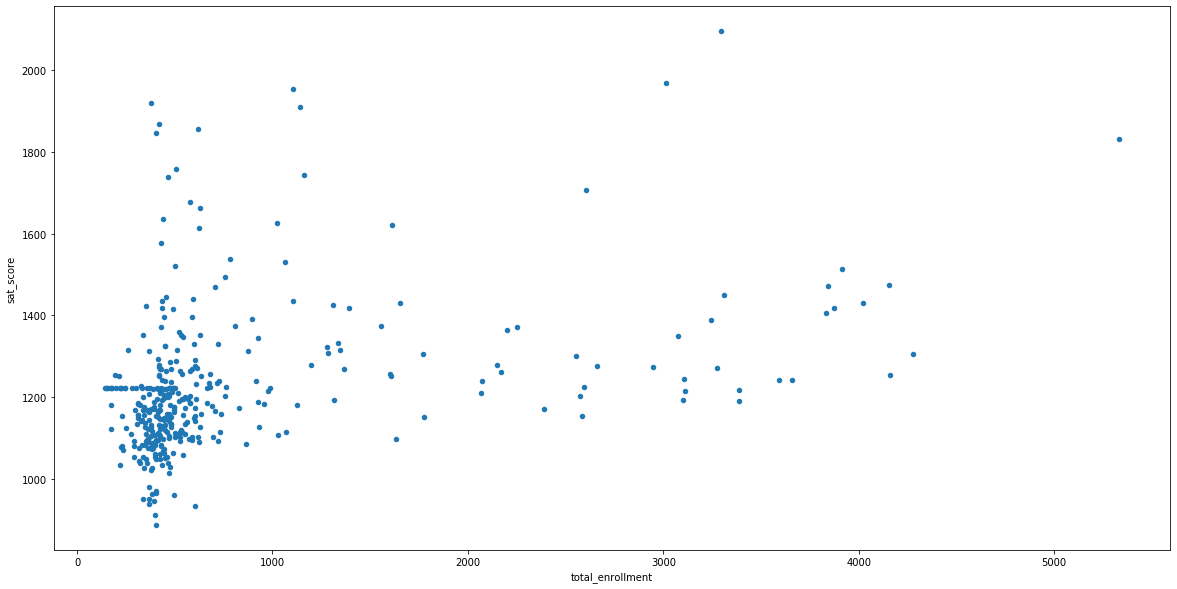

In [104]:
# https://stackoverflow.com/questions/39416004/matplotlib-not-displaying-image-on-jupyter-notebook
%matplotlib inline 
import matplotlib.pyplot as plt
combined.plot.scatter(x='total_enrollment', y='sat_score')
plt.gcf().set_size_inches(20, 10) # https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size



plt.show()

### 6. Exploring Schools With Low SAT Scores and Enrollment
--------

<div id="body" class="dq-mission-markup MissionLearn__section"><div><p>Judging from the plot we just created, it doesn't appear that there's an extremely strong correlation between <code>sat_score</code> and <code>total_enrollment</code>.  If there was a very strong correlation, we'd expect all of the points to line up.  Instead, there's a large cluster of schools, and then a few others going off in three different directions.</p>
<p>However, there's an interesting cluster of points at the bottom left where <code>total_enrollment</code> and <code>sat_score</code> are both low.  This cluster may be what's making the r value so high.  It's worth extracting the names of the schools in this cluster so we can research them further.</p></div></div>

Things we will do:
<ul>
<li>Filter the <code>combined</code> dataframe to keep only those rows where <code>total_enrollment</code> is under <code>1000</code> and <code>sat_score</code> is under <code>1000</code>.  Assign the result to <code>low_enrollment</code>.</li>
<li>Display all of the items in the <code>School Name</code> column of <code>low_enrollment</code>.</li>
<li>Use <a href="https://www.wikipedia.org/" target="_blank">Wikipedia</a> and <a href="https://www.google.com" target="_blank">Google</a> to research the names of the schools.  Can you discover anything interesting about them?</li>
</ul>

In [24]:
low_enrollment = combined[(combined['total_enrollment'] < 1000) & (combined['sat_score'] < 1000)]

low_enrollment['School Name']

91       INTERNATIONAL COMMUNITY HIGH SCHOOL
125                                        0
126          BRONX INTERNATIONAL HIGH SCHOOL
139    KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141    INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176                                        0
179            HIGH SCHOOL OF WORLD CULTURES
188       BROOKLYN INTERNATIONAL HIGH SCHOOL
225    INTERNATIONAL HIGH SCHOOL AT PROSPECT
237               IT TAKES A VILLAGE ACADEMY
253                MULTICULTURAL HIGH SCHOOL
286    PAN AMERICAN INTERNATIONAL HIGH SCHOO
Name: School Name, dtype: object

<div><p>Our research on the last screen revealed that most of the high schools with low total enrollment and low SAT scores have high percentages of English language learners.  This indicates that it's actually <code>ell_percent</code> that correlates strongly with <code>sat_score</code>, rather than <code>total_enrollment</code>.  To explore this relationship further, let's plot out <code>ell_percent</code> vs <code>sat_score</code>.</p></div>

Things we will do:
- Create a scatterplot of `ell_percent` versus `sat_score`.

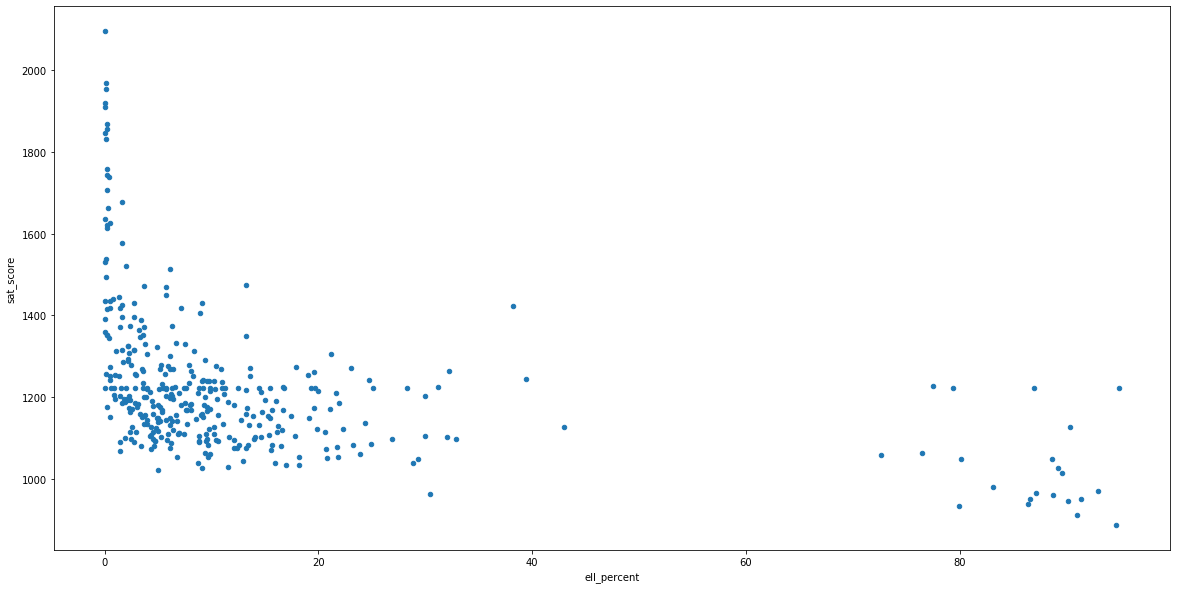

In [105]:
combined.plot.scatter(x='ell_percent', y='sat_score')
plt.gcf().set_size_inches(20, 10) # https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size

plt.show()

### 8. Calculating District-Level Statistics
------------

<div><p>One way to make very granular statistics easier to read is to aggregate them.  In this case, we will aggregate by district, which will enable us to understand how <code>ell_percent</code> varies district-by-district instead of the unintelligibly granular school-by-school variation.</p>
<p>In the last mission, we used the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html" target="_blank">pandas.DataFrame.groupby()</a> method followed by the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation" target="_blank">agg()</a> method on the resulting object to find the mean class size for each unique <code>DBN</code>.  The principle is exactly the same, except that here we'd find the mean of each column for each unique value in <code>school_dist</code>.</p></div>

Things we will do:

<ul>
<li>Find the average values for each column for each <code>school_dist</code> in <code>combined</code>.<ul>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html" target="_blank">pandas.DataFrame.groupby()</a> method to group <code>combined</code> by <code>school_dist</code>.</li>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html#aggregation" target="_blank">agg()</a> method, along with the <code>numpy.mean</code> function as an argument, to calculate the average of each group.  </li>
<li>Assign the result to the variable <code>districts</code>.</li>
</ul>
</li>
<li>Reset the index of <code>districts</code>, making <code>school_dist</code> a column again.<ul>
<li>Use the <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html" target="_blank">pandas.DataFrame.reset_index()</a> method with the keyword argument <code>inplace=True</code>.</li>
</ul>
</li>
<li>Display the first few rows of <code>districts</code> to verify that everything went okay.</li>
</ul>

In [26]:
import numpy

districts = combined.groupby(by='school_dist').agg(numpy.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,Total Grads - % of cohort,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,71.333333,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,75.453574,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,74.029937,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,76.257143,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,75.200881,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


<div><p>In this mission, we found correlations, created visualizations, and analyzed data district-by-district!  Now we have all the tools we need to analyze the data in greater depth.</p>
<p>Along the way, we learned:</p>
<ul>
<li>How to find correlations, and what those correlations mean</li>
<li>Why we should plot data out, rather than relying on the r value alone</li>
<li>That <code>ell_percent</code> has a strong negative correlation with sat_score</li>
</ul>
<p>We now have the skills to analyze data sets and explain the quirks we find.  These are essential skills for any data science professional.</p>
<p>Next, we'll use the skills and tools we've developed to analyze the New York City high school data more fully in a guided project.</p></div>

# Analyzing NYC High School Data
## 1. Introduction:

In other segment on DataQuest platform, we have explored relationships between [SAT](https://en.wikipedia.org/wiki/SAT) scores and demographic factors in New York City public schools. For a brief bit of background, the [SAT](https://en.wikipedia.org/wiki/SAT), or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year. The SAT has three sections, each is worth `800` points. Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has published data on [student SAT scores](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) by high school, along with additional demographic datasets. During some of the other segments, we combined the following datasets into a single, clean pandas dataframe:

- [`SAT scores by school`](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City
- [`School attendance`](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) - Attendance information for each school in New York City
- [`Class size`](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school
- [`AP test results`](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
- [`Graduation outcomes`](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated and other outcome information
- [`Demographics`](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school
- [`School survey`](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Surveys of parents, teachers, and students at each school

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that either the SAT is unfair, or certain racial groups, ideed, consistently perform better on the SAT.

In another segment, we began performing some analysis. We'll extend that analysis in this segment. We've included the code to read in all of the data, combine it, and create correlations in the notebook.

The dataframe combined contains all of the data we'll be using in our analysis.

What we will do:
<ul>
<li>Check out if matplotlib is set up to work in Jupyter notebook.</li>
<li>There are several fields in <code>combined</code> that originally came from a <a href="https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8" target="_blank">survey of parents, teachers, and students</a>.  Make a bar plot of the correlations between these fields and <code>sat_score</code>.<ul>
<li>We can find a list of the fields in the <code>survey_fields</code> variable in the notebook.</li>
</ul>
</li>
<li>Consult the data dictionary that's part of the <code>zip</code> file. We can download it <a href="https://data.cityofnewyork.us/Education/NYC-School-Survey-2011/mnz3-dyi8" target="_blank">from the City of New York's website</a>.  <ul>
<li>Find any surprising correlations</li>
</ul>
</li>
<li>Write up results in a Markdown cell.</li>
</ul>

In [27]:
# """Plotting survey correlations:"""
# # Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
# survey_fields.drop("DBN", axis=1)

# # Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")
# survey_fields # Test

In [28]:
correlations.head()

SAT Critical Reading Avg. Score    0.986820
SAT Math Avg. Score                0.972643
SAT Writing Avg. Score             0.987771
sat_score                          1.000000
AP Test Takers                     0.523140
Name: sat_score, dtype: float64

In [29]:
combined['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1207.0
4    1621.0
Name: sat_score, dtype: float64

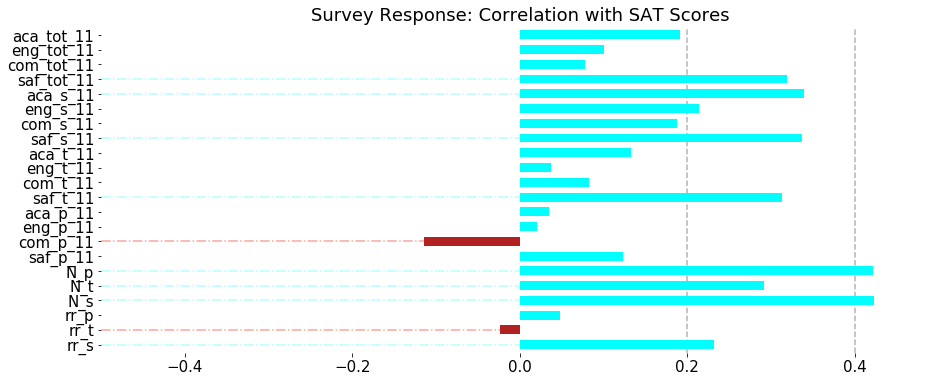

rr_s                                      Student Response Rate
rr_t                                      Teacher Response Rate
N_s                               Number of student respondents
N_t                               Number of teacher respondents
N_p                                Number of parent respondents
com_p_11          Communication score based on parent responses
saf_t_11      Safety and Respect score based on teacher resp...
saf_s_11      Safety and Respect score based on student resp...
aca_s_11      Academic expectations score based on student r...
saf_tot_11                       Safety and Respect total score
dtype: object

In [30]:
# Creating new map for color-coding positive and negative values:
negative_corr = combined.corr()["sat_score"][survey_fields] < 0
positive_corr = combined.corr()["sat_score"][survey_fields] > 0.23

fig = plt.figure(figsize=(15,6))

# Plotting bar chart
ax = combined.corr()["sat_score"][survey_fields].plot.barh(fontsize=15,
                                                           zorder=10,# `zorder` is the order of layers: greater number - more on top 
                                                           width=0.6,
                                                           color=negative_corr.map(
                                                               {True: "firebrick", False: "aqua"}
                                                           )
                                                          ) 
"""
Using list comprehensions we will extrapolate the index of negative and values.
We will use this index to create horizontal lines, so it will be easy to see
what `survey_fields` indexes are important.
"""
neg = [i for i, x in enumerate(negative_corr) if x]
ax.hlines(neg, -0.5, 0, colors='salmon', alpha=0.7, linestyle='dashdot', zorder=5)

pos = [i for i, x in enumerate(positive_corr) if x]
ax.hlines(pos, -0.5, 0, colors='aqua', alpha=0.3, linestyle='dashdot', zorder=5)

ax.set_title("Survey Response: Correlation with SAT Scores", size=18)
ax.set_xlim(-0.5, 0.5)
ax.axvline(0.2, color="dimgray", alpha=0.5, linestyle="--")
ax.axvline(0.4, color="dimgray", alpha=0.5, linestyle="--")
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)

plt.show()

"""
Because we don't want to scroll up and down 
to know what's the meaning of each particular shorcut of each relevant column
We will create pseudo legend below the plot output:
"""

legend_dict = {'sch_type' : 'School type (Elementary, Middle, High, etc)',
'location' : 'School name',
'enrollment' : 'Enrollment size',
'borough' : 'Borough',
'principal' : 'Principal name',
'studentsurvey' : 'Only students in grades 6-12 partipate in the student survey.',
'rr_s' : 'Student Response Rate',
'rr_t' : 'Teacher Response Rate',
'rr_p' : 'Parent Response Rate',
'N_s' : 'Number of student respondents',
'N_t' : 'Number of teacher respondents',
'N_p' : 'Number of parent respondents',
'nr_s' : 'Number of eligible students',
'nr_t' : 'Number of eligible teachers',
'nr_p' : 'Number of eligible parents',
'saf_p_11' : 'Safety and Respect score based on parent responses',
'com_p_11' : 'Communication score based on parent responses',
'eng_p_11' : 'Engagement score based on parent responses',
'aca_p_11' : 'Academic expectations score based on parent responses',
'saf_t_11' : 'Safety and Respect score based on teacher responses',
'com_t_11' : 'Communication score based on teacher responses',
'eng_t_11' : 'Engagement score based on teacher responses',
'aca_t_11' : 'Academic expectations score based on teacher responses',
'saf_s_11' : 'Safety and Respect score based on student responses',
'com_s_11' : 'Communication score based on student responses',
'eng_s_11' : 'Engagement score based on student responses',
'aca_s_11' : 'Academic expectations score based on student responses',
'saf_tot_11' : 'Safety and Respect total score',
'com_tot_11' : 'Communication total score',
'eng_tot_11' : 'Engagement total score',
'aca_tot_11' : 'Academic Expectations total score'}

for v in legend_dict:
    leg_index = [survey_fields[i] 
                 for i, x in enumerate(negative_corr) if x
                ] + [survey_fields[i] 
                     for i, x in enumerate(positive_corr) if x]
# print(leg_index) # test

relevant_dict = {}
for k, v in legend_dict.items():
    if k in leg_index:
        relevant_dict[k] = v
relevant_dict = pd.Series(relevant_dict)
relevant_dict

The list of columns that have positive correlations (with SAT scores) greater than 0.2:

| Field Name | Field Description |
| --- | --- |
| `rr_s` | Student Response Rate |
| `N_s` | Number of student respondents |
| `N_t` | Number of teacher respondents |
| `N_p` | Number of parent respondents |
| `saf_t_11` | Safety and Respect score based on teacher responses |
| `saf_s_11` | Safety and Respect score based on student responses |
| `eng_s_11` | Engagement score based on student responses |
| `aca_s_11` | Academic expectations score based on student responses |
| `saf_tot_11` | Safety and Respect total score |

We can point out that safety and respect perceptions seem to be important in achieving higher SAT scores. The size of the school seems to be an important factor too - it's correlated with SAT scores. The reason why bigger schools with more students and bigger classes may be related to the fact that it's a better environment for learning. Another possibility is the fact that there are more good teachers, or more engaged parents: they are more focused on the quality of a kids education. Also, it is possible that bigger schools have bigger budgets.


There are two factors showing a negative correlation with SAT scores: teacher response rate (`rr_t`) and communication score based on parent responses (` com_p_11`). These negative correlations aren't small. The conclusion is: those factors aren't correlated with sat_socre at all.

### 2. Exploring Safety and SAT Scores

<div><p>On the last screen, you may have noticed that <code>saf_t_11</code> and <code>saf_s_11</code>, which measure how teachers and students perceive safety at school, correlated highly with <code>sat_score</code>.  On this screen, we'll dig into this relationship a bit more and try to figure out which schools have low safety scores.</p></div>

The next things to do:
<ul>
<li>Investigate safety scores.<ul>
<li>Make a scatter plot of the <code>saf_s_11</code> column vs. the <code>sat_score</code> in <code>combined</code>.</li>
<li>Write up a conclusions about safety and SAT scores in a Markdown cell.</li>
</ul>
</li>
<li>Compute safety scores.<ul>
<li>Compute the average safety score for each borough.</li>
<li>Write up conclusions about safety by geographic area in a Markdown cell.</a>.</li>
</ul>
</li>
</ul>

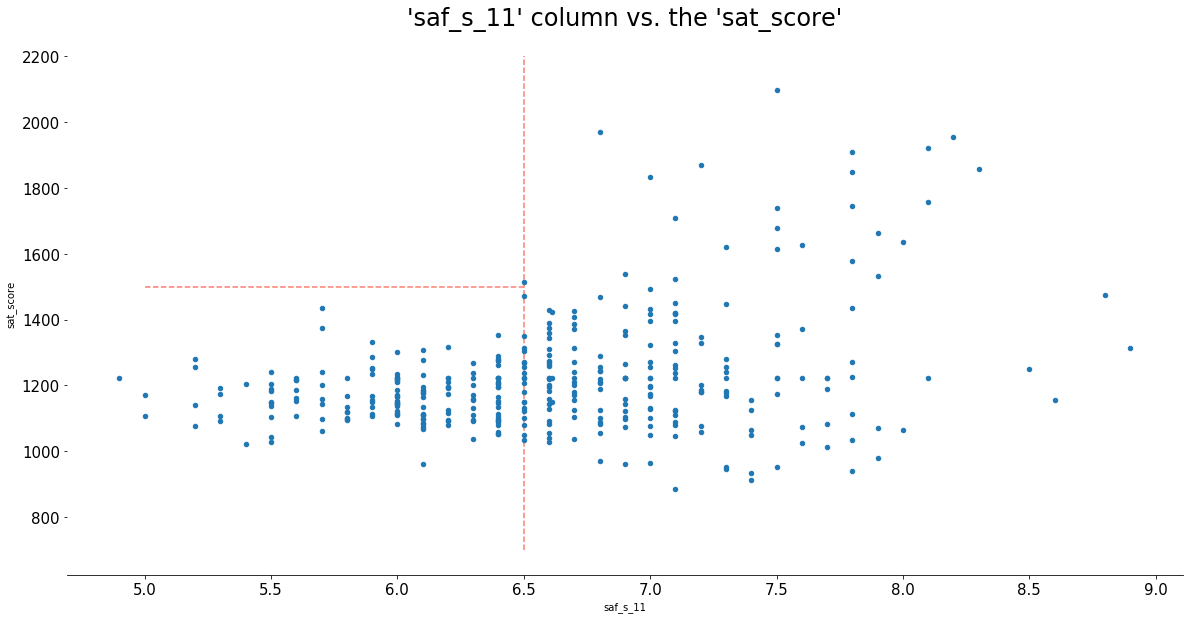

In [108]:
# `saf_s_11` column vs. the `sat_score` in `combined`:
ax_1 = combined.plot(x='saf_s_11', y='sat_score', kind='scatter', fontsize=15, zorder=5)

ax_1.set_title("'saf_s_11' column vs. the 'sat_score'", fontsize = 24)
ax_1.hlines(1500, 5, 6.5, colors='salmon', alpha=1, linestyle="--")
ax_1.vlines(6.5, 700, 2200, color="salmon", alpha=1, linestyle="--")
ax_1.spines["right"].set_visible(False)    
ax_1.spines["left"].set_visible(False)
ax_1.spines["top"].set_visible(False)    
#ax.spines["bottom"].set_visible(False)
plt.gcf().set_size_inches(20, 10) # https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size



plt.show()

There is some correlation between SAT scores and safety, although it isn't very strong one. There are a few schools with extremely high SAT scores and high safety scores. There are, also, a few schools with low safety scores and low SAT scores. No school with a safety score lower than 6.5 has an average SAT score higher than 1500 points(a red line) or so.

In [32]:
boros = combined.groupby('borough').agg(numpy.mean)["saf_s_11"]
print(boros)

borough
Bronx            6.606577
Brooklyn         6.370755
Manhattan        6.831370
Queens           6.721875
Staten Island    6.530000
Name: saf_s_11, dtype: float64


It looks like Brooklyn has low safety scores.
Manhattan and Queens tend to have higher safety scores. But what about sub boroughs? Let's check that too.
We can start with seeing if we have names of sub borouhs:

In [33]:
import re

def borough_string(string):
    borough = re.findall("(?<=\\n)(\w+)", string)
    return borough

combined['borough'] = data['hs_directory']['Location 1'].apply(borough_string)
type(combined['borough'][1])
combined['borough'].head(60)

0           [Far]
1      [Brooklyn]
2      [Brooklyn]
3         [Bronx]
4           [New]
5           [New]
6         [Bronx]
7      [Brooklyn]
8         [Bronx]
9      [Elmhurst]
10     [Brooklyn]
11           [NY]
12     [Brooklyn]
13           [NY]
14        [Bronx]
15           [Of]
16          [New]
17        [Bronx]
18      [Jamaica]
19          [New]
20           [NY]
21     [Brooklyn]
22    [Manhattan]
23     [Flushing]
24          [New]
25     [Brooklyn]
26     [Flushing]
27    [Bellerose]
28          [New]
29     [Brooklyn]
30        [Bronx]
31        [Bronx]
32     [Brooklyn]
33        [Bronx]
34          [New]
35      [Jamaica]
36         [Long]
37          [New]
38          [New]
39     [Brooklyn]
40     [Brooklyn]
41     [Brooklyn]
42          [New]
43          [New]
44           [NY]
45          [New]
46           [NY]
47      [Jamaica]
48     [Brooklyn]
49        [Bronx]
50     [Brooklyn]
51          [New]
52     [Brooklyn]
53     [Brooklyn]
54        [Bronx]
55        

There are several ways to filter our output. We need to filter it out, because we have boroughs and sub boroughs detected. The approach we will choose is to find a list of sub boroughs, add it as a new column in the `combined` data frame. Then we will compute the average safety score for each borough and create a plot with horizontal bars. 
To do that we need to find all sub boroughs. We will use [NYC Sub-Borough Neighborhoods](https://webcache.googleusercontent.com/search?q=cache:MjNfjj3CGVgJ:https://a816-dohbesp.nyc.gov/IndicatorPublic/EPHTPDF/subboro.pdf+&cd=4&hl=pl&ct=clnk&gl=pl&client=firefox-b-d).

After taking the list from the page, we saved it in a `.txt` file called `New York Sub Boroughs.txt`. Because the file is a single string object, we need to convert it into a list, where each version of sub borough name is a new position in a list and, also, every new line is a new position in the list. For a better understanding small part of the list below:

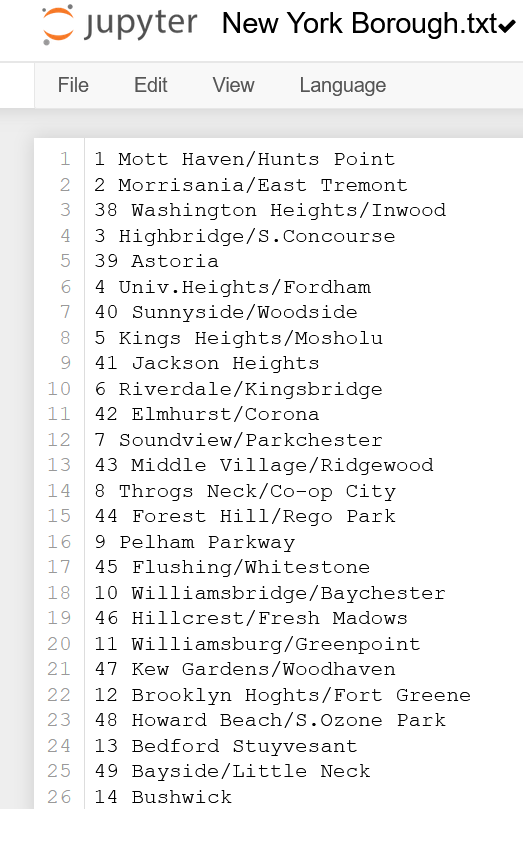

In [34]:
import get_gifNimage
from get_gifNimage import get_gifNimage
get_gifNimage('Sub Boroughs.png')

We will use `re.search()` regex's module to prepare the data.

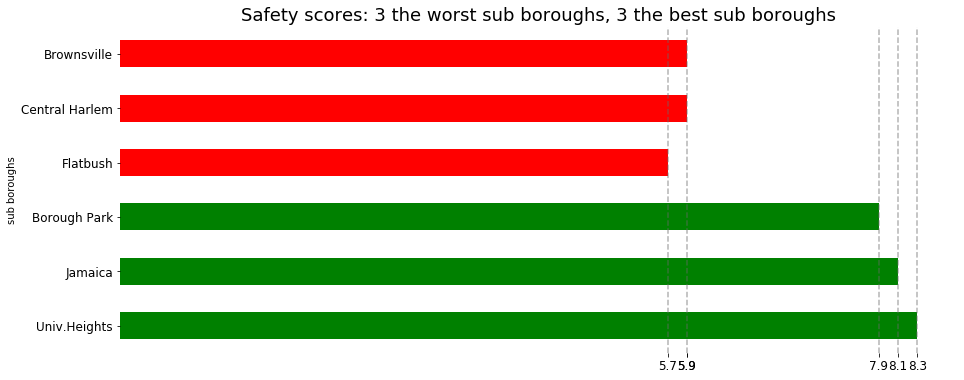

In [111]:
import re

NY_borough = []
with open('New York Sub Boroughs.txt') as myfile:
    for line in myfile:
        
        m = re.search(r"([a-zA-z]+(\s*|\.)[a-zA-z]*\s*[a-zA-z](?!\w))", line)
        NY_borough.append(m[1])
# print(NY_borough) # Test
myfile.close()

combined['sub boroughs'] = pd.Series(NY_borough)
# print(combined['sub boroughs'].head()) # Test

sub_boroughs = combined.groupby('sub boroughs').agg(numpy.mean)["saf_s_11"]
low_top3 = sub_boroughs.sort_values(ascending=True).nsmallest(n=3)
high_top3 = sub_boroughs.sort_values(ascending=True).nlargest(n=3)
# low_hig_top6 = pd.Series([])
high_top3 = high_top3.append(low_top3, ignore_index=False)
high_low_top6 = high_top3
# print(high_low_top6) # Test

fig = plt.figure(figsize=(15,6))

# Colors for the bars:
col = []
for b in sub_boroughs.sort_values(ascending=True):
    if b <= 5.9:
        col.append("green")
    if b >= 7.9:
        col.append('red')

ax = high_low_top6.plot.barh(fontsize=12, color=col)
ax.set_title("Safety scores: 3 the worst sub boroughs, 3 the best sub boroughs", size=18)

ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
tick_list = high_low_top6.tolist()
ax.set_xticks(tick_list)
ax.axvline(5.7, color="dimgray", alpha=0.5, linestyle="--")
ax.axvline(5.9, color="dimgray", alpha=0.5, linestyle="--")
ax.axvline(7.9, color="dimgray", alpha=0.5, linestyle="--")
ax.axvline(8.1, color="dimgray", alpha=0.5, linestyle="--")
ax.axvline(8.3, color="dimgray", alpha=0.5, linestyle="--")
## print(tick_list) # Test
plt.show()

It looks like `Flatbush` has the lowest safety score. The safest sub boroughs schools are located in `Univ. Heights`.

The reason why is like that is unknown. It could be an effect of many factors like: managing, better environment.
What's interesting `Univ. Heights` is a little more unsafe sub borough than `Flatbush`. According to Wikipedia quote:

**(Flatbush)**[https://en.wikipedia.org/wiki/Flatbush,_Brooklyn#Demographics]: "*The 67th Precinct also has a lower crime rate than in the 1990s, with crimes across all categories having decreased by 79.9% between 1990 and 2018. The precinct reported 6 murders, 43 rapes, 246 robberies, 601 felony assaults, 225 burglaries, 586 grand larcenies, and 98 grand larcenies auto in 2018.*"

**(Univ. Heights)**[https://en.wikipedia.org/wiki/University_Heights,_Bronx#Police_and_crime]: "*The 46th Precinct has a lower crime rate than in the 1990s, with crimes across all categories having decreased by 76.3% between 1990 and 2020. The precinct reported 7 murders, 23 rapes, 359 robberies, 600 felony assaults, 379 burglaries, 571 grand larcenies, and 126 grand larcenies auto in 2020.[17]*"

### 3. Exploring Race and SAT Scores

<div><p>There are a few columns that indicate the percentage of each race at a given school:</p>
<ul>
<li><code>white_per</code></li>
<li><code>asian_per</code></li>
<li><code>black_per</code></li>
<li><code>hispanic_per</code></li>
</ul>
<p>By plotting out the correlations between these columns and <code>sat_score</code>, we can determine whether there are any racial differences in SAT performance.</p></div>

Things we will do:

<ul>
<li>Investigate racial differences in SAT scores.<ul>
<li>Make a bar plot of the correlations between the columns above and <code>sat_score</code>.</li>
<li>Write up a Markdown cell containing your findings.  Are there any unexpected correlations?</li>
</ul>
</li>
<li>Explore schools with low SAT scores and high values for <code>hispanic_per</code>.<ul>
<li>Make a scatter plot of <code>hispanic_per</code> vs. <code>sat_score</code>.</li>
<li>What does the scatter plot show?  Record any interesting observations in a Markdown cell.</li>
</ul>
</li>
<li>Research any schools with a <code>hispanic_per</code> greater than <code>95%</code>.<ul>
<li>Find the school names in the data.</li>
<li>Use Wikipedia and Google to research the schools by name.</li>
<li>Is there anything interesting about these particular schools?  Record your findings in a Markdown cell.</li>
</ul>
</li>
<li>Research any schools with a <code>hispanic_per</code> less than <code>10%</code> and an average SAT score greater than <code>1800</code>.<ul>
<li>Find the school names in the data.</li>
<li>Use Wikipedia and Google to research the schools by name.</li>
<li>Is there anything interesting about these particular schools?  Record your findings in a Markdown cell.</li>
</ul>
</li>
</ul>

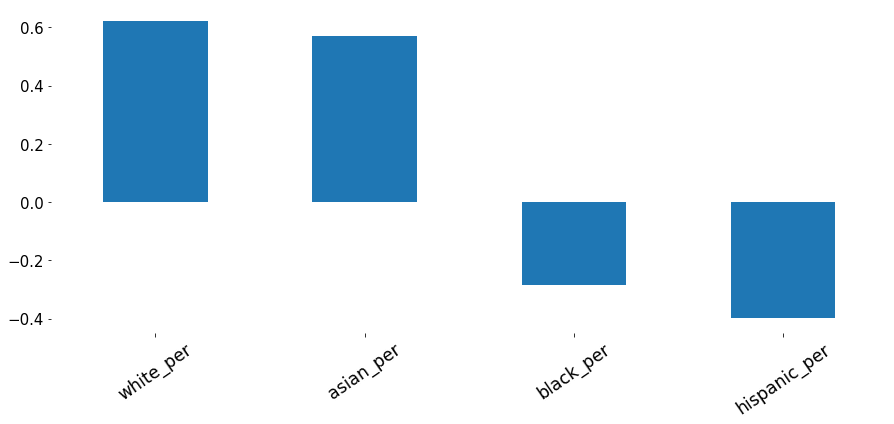

In [119]:
race_per = ["white_per", "asian_per", "black_per", "hispanic_per"]
fig = plt.figure(figsize=(15,6))
ax = combined.corr()["sat_score"][race_per].plot.bar(fontsize=15)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set_xticklabels(race_per, rotation=34.56789, fontsize='xx-large') # We will set xticklabels in angle to be easier to read)
# The labels are centred horizontally, so when we rotate them 34.56789°

plt.show()

A higher percentage of white and Asian students at a school correlates positively with the sat score, whereas a higher percentage of black and Hispanic students correlates negatively with sat score. 
Possible reasons:
- a lack of funding for schools in certain areas.
- more poor sub-boroughs

Let's see the same correlation on the scatter plot:

C:\Users\b2b\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


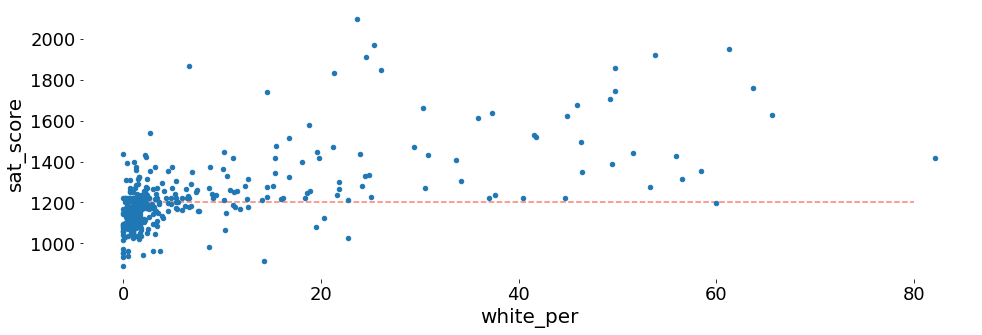

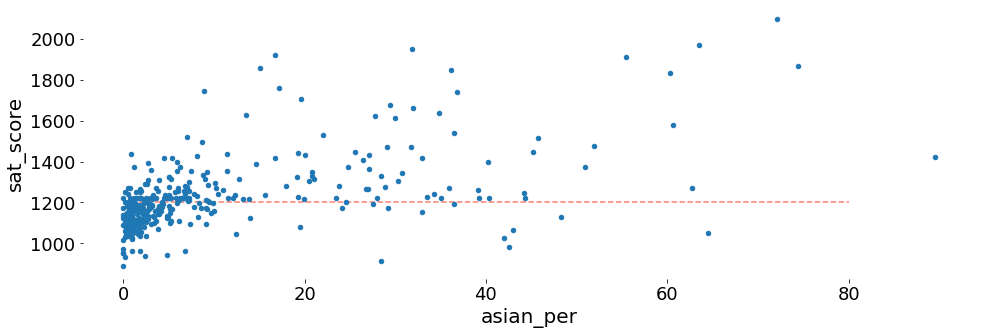

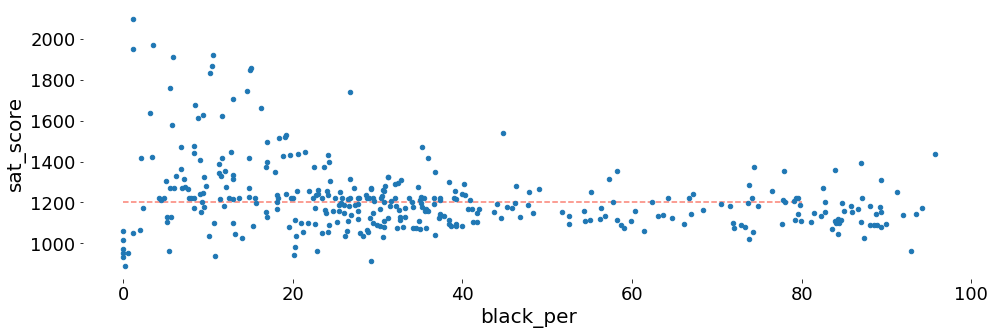

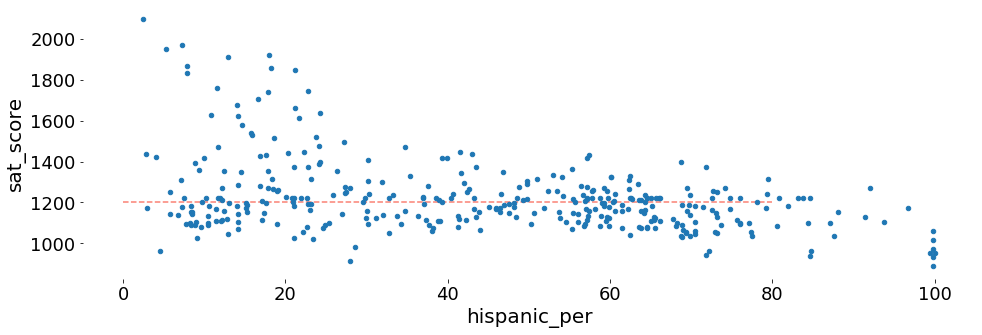

In [125]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

race_per = ["white_per", "asian_per", "black_per", "hispanic_per"]


for sp in range(0,4):
    ax = fig.add_subplot(1,4,sp+1)
    ax = combined.plot(x = race_per[sp], y = 'sat_score', kind='scatter', fontsize=18, zorder=5)
#     ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.hlines(1200, 0, 80, color="salmon", alpha=1, linestyle="--")
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_ylabel('sat_score', fontsize=20)
    ax.set_xlabel(race_per[sp], fontsize=20)
    
    plt.gcf().set_size_inches(16, 5) # https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size

plt.show()

In [55]:
print(combined[combined["hispanic_per"] > 95]["SCHOOL NAME"])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


The schools listed above seems to be related to fresh immigrants in the US. Maybe it would explain the lower SAT scores.

In [56]:
print(combined[(combined["hispanic_per"] < 10) & (combined["sat_score"] > 1800)]["SCHOOL NAME"])

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object



The schools listed above appear to be specialized science and technology schools, which means: receiving extra funding, and only admit students who pass an entrance exam. It can explain why their students tend to do better on the SAT - they are students from all over New York City who did well on a standardized test.

### 4. Exploring Gender and SAT Scores

<ul>
<div><p>There are two columns that indicate the percentage of each gender at a school:</p>
<ul>
<li><code>male_per</code></li>
<li><code>female_per</code></li>
</ul>
<p>We can plot out the correlations between each percentage and <code>sat_score</code>.</p></div>

<ul>
<li>Next we will:<ul>
<li>Investigate gender differences in SAT scores.<ul>
<li>Make a bar plot of the correlations between the columns above and <code>sat_score</code>.</li>
<li>Record findings in a Markdown cell.  Are there any unexpected correlations?</li>
</ul>
</li>
<li>Investigate schools with high SAT scores and a high <code>female_per</code>.<ul>
<li>Make a scatter plot of <code>female_per</code> vs. <code>sat_score</code>.</li>
<li>What does the scatter plot show?  Record any interesting observations in a Markdown cell.</li>
</ul>
</li>
<li>Research any schools with a <code>female_per</code> greater than <code>60%</code> and an average SAT score greater than <code>1700</code>.<ul>
<li>Find the school names in the data.</li>
<li>Use Wikipedia and Google to research the schools by name.</li>
<li>Is there anything interesting about these particular schools? Do a Markdown.</li>
</ul>
</li>
</ul>

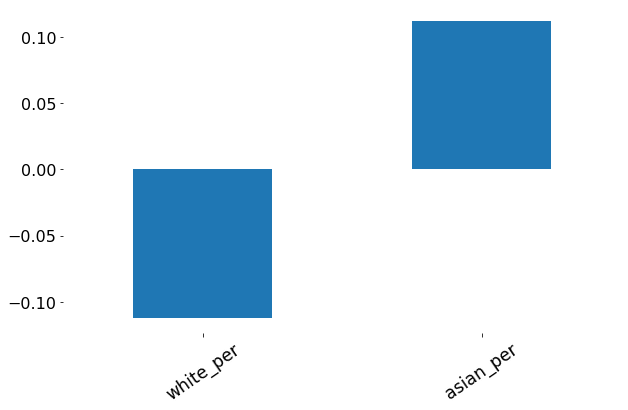

In [129]:
gender_per = ["male_per", "female_per"]

fig = plt.figure(figsize=(10,6))
ax = combined.corr()["sat_score"][gender_per].plot.bar(fontsize=16)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set_xticklabels(race_per, rotation=34.56789, fontsize='xx-large') # We will set xticklabels in angle to be easier to read)
# The labels are centred horizontally, so when we rotate them 34.56789°


plt.show()

From the output, we can see that a high percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score. It's good to keep in mind that the difference isn't much.

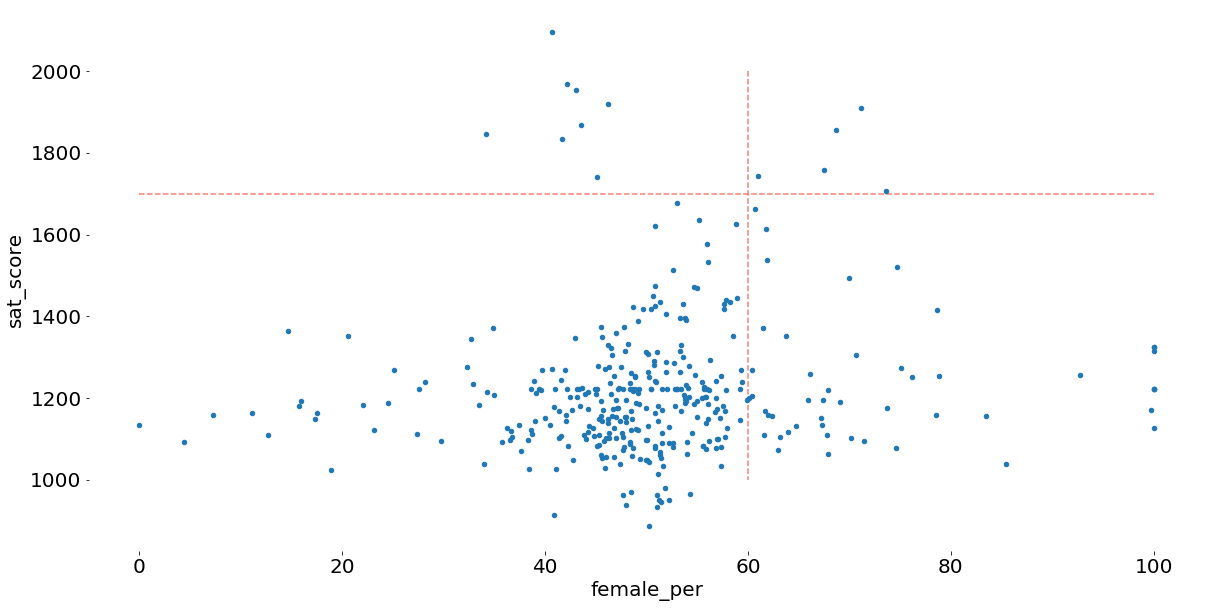

In [136]:
ax = combined.plot.scatter("female_per", "sat_score", fontsize=20, zorder=5)

ax.hlines(1700, 0, 100, color="salmon", alpha=1, linestyle="--")
ax.vlines(60, 2000, 1000, color="salmon", alpha=1, linestyle="--")

ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set_xlabel("female_per", fontsize=20)
ax.set_ylabel("sat_score", fontsize=20)

plt.gcf().set_size_inches(20, 10) # https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size

plt.show()

In [74]:
print(combined[(combined["sat_score"] > 1700) & (combined['female_per'] > 60)]["SCHOOL NAME"])

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


These schools appear to be a liberal arts schools. It seems to be that they have high standards.

### 5. Exploring AP Scores vs. SAT Scores
<ul>
<div><p>In the U.S., high school students take <a href="https://en.wikipedia.org/wiki/Advanced_Placement_exams" target="_blank">Advanced Placement</a> (AP) exams to earn college credit.  There are AP exams for many different subjects.</p>
<p>It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores.  Let's explore this relationship.  Because <code>total_enrollment</code> is highly correlated with <code>sat_score</code>, we don't want to lead to bias results.  Instead, we'll look at the percentage of students in each school who took at least one AP exam.

<p>    
<ul>
Next we will:
<ul>
<li>Calculate the percentage of students in each school that took an AP exam.<ul>
<li>Divide the <code>AP Test Takers</code> column by the <code>total_enrollment</code> column.<ul>
<li>The column name <code>AP Test Takers</code> has a space at the end -- don't forget to add it!</li>
</ul>
</li>
<li>Assign the result to the <code>ap_per</code> column.</li>
</ul>
</li>
<li>Investigate the relationship between AP scores and SAT scores.<ul>
<li>Make a scatter plot of <code>ap_per</code> vs. <code>sat_score</code>.</li>
<li>What does the scatter plot show?  Record any interesting observations in a Markdown cell.</li>
</ul>
</li>
</ul>

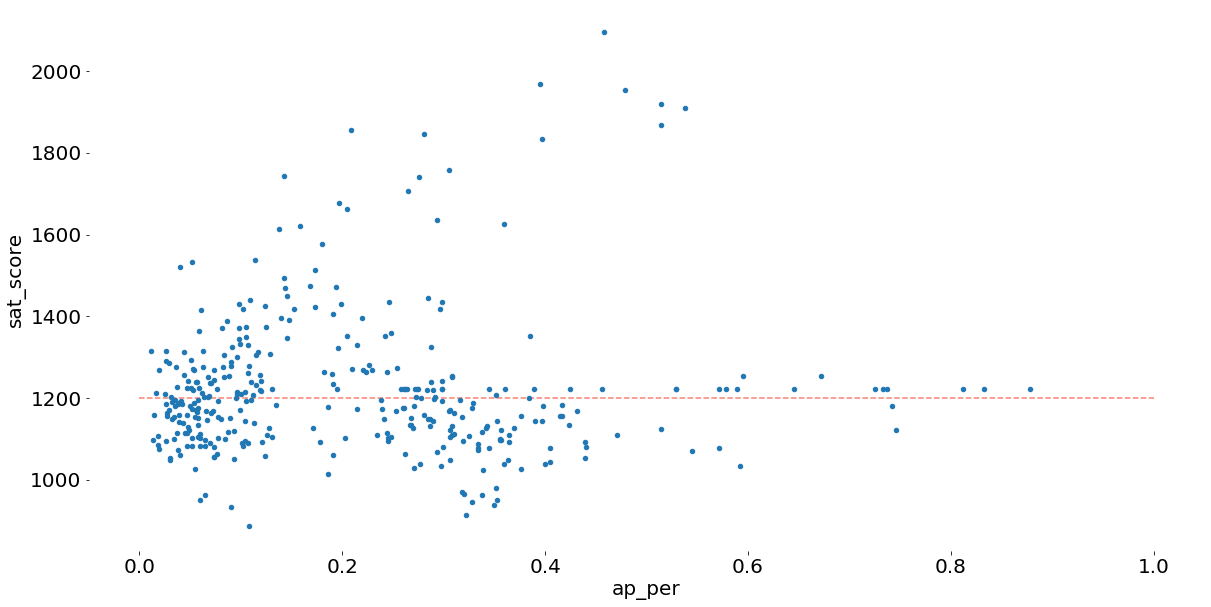

In [139]:
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']

ax = combined.plot.scatter("ap_per", "sat_score", fontsize=20, zorder=5)

ax.hlines(1200, 0, 1, color="salmon", alpha=4, linestyle="--")

ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set_xlabel("ap_per", fontsize=20)
ax.set_ylabel("sat_score", fontsize=20)

plt.gcf().set_size_inches(20, 10) # https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size

plt.show()

As we can see, there is a relationship between the percentage of students in a school who take the AP exam, and their average SAT scores. It's not a strong correlation. 